In [7]:
from glob import glob
import pandas as pd
import struct
import numpy as np
import struct
import os
from time import time
import matplotlib.pyplot as plt # not needed if you don't want to plot
import pickle
import warnings
import sys
import gzip
import json
from scipy.interpolate import interp2d
from scripts import *
from material import *
from scipy.stats import norm
starting_dir = os.getcwd()

In [8]:
transmission_curve = pd.read_csv("pebble_outward_current_runs/pebble_outward_current_data.csv", index_col=0)

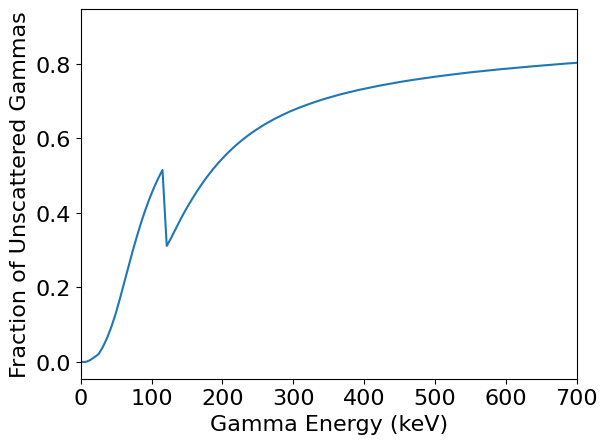

In [9]:
plt.rcParams.update({'font.size': 16})
plt.figure()
plt.plot(transmission_curve["energy"], transmission_curve["efficiency"])
plt.xlabel("Gamma Energy (keV)")
plt.ylabel("Fraction of Unscattered Gammas")
plt.xlim(0,700)
#plt.ylim(0,0.2)
plt.savefig("transmission_curve.png")
plt.show()


In [10]:
np.interp(661, transmission_curve["energy"], transmission_curve["efficiency"])

0.7967681550998291

In [11]:
ZAI_list = [922350, 922380, 942390, 942410, 541350, 551370, 10010, 10030, 20040, 30070, 40100, 50100, 50110, 60120, 60140, 80160, 80170, 290670, 300660, 300670, 300680, 300700, 300720, 310690, 310710, 310720, 320720, 320730, 320740, 320760, 320770, 320780, 330750, 330760, 330770, 330780, 330790, 330810, 340760, 340770, 340780, 340790, 340791, 340800, 340810, 340811, 340820, 340830, 340840, 340850, 340860, 350790, 350810, 350820, 350830, 350840, 350841, 350850, 350860, 350870, 350880, 360800, 360810, 360820, 360830, 360831, 360840, 360850, 360851, 360860, 360870, 360880, 360890, 360900, 360910, 370830, 370840, 370850, 370860, 370870, 370880, 370890, 370900, 370901, 370910, 370920, 370930, 380860, 380870, 380880, 380890, 380900, 380910, 380920, 380930, 380940, 380950, 390880, 390890, 390891, 390900, 390910, 390911, 390920, 390930, 390940, 390950, 390960, 390961, 390970, 400900, 400910, 400920, 400930, 400940, 400950, 400960, 400970, 400980, 400990, 401000, 401010, 401020, 410930, 410931, 410940, 410950, 410951, 410960, 410970, 410980, 410981, 410990, 410991, 411000, 411010, 420940, 420950, 420960, 420970, 420980, 420990, 421000, 421010, 421020, 421030, 421040, 421050, 421060, 430980, 430990, 430991, 431000, 431010, 431020, 431030, 431040, 431050, 431060, 431070, 440990, 441000, 441010, 441020, 441030, 441040, 441050, 441060, 441070, 441080, 441090, 451020, 451021, 451030, 451031, 451040, 451041, 451050, 451051, 451060, 451061, 451070, 451080, 451090, 461040, 461050, 461060, 461070, 461080, 461090, 461100, 461110, 461120, 471090, 471091, 471101, 471110, 471111, 471120, 471130, 471150, 481100, 481110, 481120, 481130, 481131, 481140, 481150, 481151, 481160, 481170, 481171, 481180, 491130, 491150, 491151, 491170, 491171, 491191, 501150, 501160, 501170, 501171, 501180, 501190, 501191, 501200, 501210, 501211, 501220, 501230, 501231, 501240, 501250, 501251, 501260, 501270, 501271, 501280, 501290, 501291, 501300, 501301, 501310, 501311, 501320, 511210, 511220, 511230, 511240, 511250, 511260, 511261, 511270, 511280, 511281, 511290, 511300, 511301, 511310, 511320, 511321, 511330, 521220, 521230, 521231, 521240, 521250, 521251, 521260, 521270, 521271, 521280, 521290, 521291, 521300, 521310, 521311, 521320, 521330, 521331, 521340, 521350, 521360, 531260, 531270, 531280, 531290, 531300, 531301, 531310, 531320, 531321, 531330, 531340, 531341, 531350, 531360, 531361, 531370, 531380, 541280, 541290, 541300, 541310, 541311, 541320, 541330, 541331, 541340, 541351, 541360, 541370, 541380, 541390, 541400, 551320, 551330, 551340, 551341, 551350, 551351, 551360, 551380, 551381, 551390, 551400, 551410, 561320, 561340, 561350, 561360, 561370, 561371, 561380, 561390, 561400, 561410, 561420, 561430, 561440, 561450, 571370, 571380, 571390, 571400, 571410, 571420, 571430, 571440, 571450, 571460, 571461, 581380, 581390, 581400, 581410, 581420, 581430, 581440, 581450, 581460, 581470, 581480, 591410, 591420, 591421, 591430, 591440, 591441, 591450, 591460, 591470, 591480, 591481, 591490, 591510, 601420, 601430, 601440, 601450, 601460, 601470, 601480, 601490, 601500, 601510, 601520, 601530, 611460, 611470, 611480, 611481, 611490, 611510, 611520, 611530, 611540, 621470, 621480, 621490, 621500, 621510, 621520, 621530, 621540, 621550, 621560, 621570, 621580, 631510, 631520, 631530, 631540, 631541, 631550, 631560, 631570, 631580, 631590, 641520, 641540, 641550, 641560, 641570, 641580, 641590, 641600, 651580, 651590, 651600, 651610, 661600, 661610, 661620, 661630, 661640, 661660, 671650, 671660, 671661, 681660, 681670, 681680, 681690, 681700, 691690, 691710, 701720, 902310, 902320, 902340, 912310, 912340, 922320, 922340, 922360, 922370, 922390, 932370, 932380, 932390, 942380, 942400, 942420, 952410]

def rename_ZAI_columns(dataframe):
    '''
    Convert the isotope headers of a dataframe from ZAId integer format into symbol-mass string format.
    '''
    z_map = {'Ac': 89, 'Ag': 47, 'Al': 13, 'Am': 95, 'Ar': 18, 'As': 33, 'At': 85, 'Au': 79, 'B': 5, 'Ba': 56, 'Be': 4,
             'Bh': 107, 'Bi': 83, 'Bk': 97, 'Br': 35, 'C': 6, 'Ca': 20, 'Cd': 48, 'Ce': 58,
             'Cf': 98, 'Cl': 17, 'Cm': 96, 'Co': 27, 'Cr': 24, 'Cs': 55, 'Cu': 29, 'Ds': 110, 'Db': 105, 'Dy': 66, 'Er': 68,
             'Es': 99, 'Eu': 63, 'F': 9, 'Fe': 26, 'Fm': 100, 'Fr': 87, 'Ga': 31, 'Gd':
                 64, 'Ge': 32, 'H': 1, 'He': 2, 'Hf': 72, 'Hg': 80, 'Ho': 67, 'Hs': 108, 'I': 53, 'In': 49, 'Ir': 77,
             'K': 19, 'Kr': 36, 'La': 57, 'Li': 3, 'Lr': 103, 'Lu': 71, 'Md': 101, 'Mg': 12, 'Mn':
                 25, 'Mo': 42, 'Mt': 109, 'N': 7, 'Na': 11, 'Nb': 41, 'Nd': 60, 'Ne': 10, 'Ni': 28, 'No': 102, 'Np': 93,
             'O': 8, 'Os': 76, 'P': 15, 'Pa': 91, 'Pb': 82, 'Pd': 46, 'Pm': 61, 'Po': 84, 'Pr':
                 59, 'Pt': 78, 'Pu': 94, 'Ra': 88, 'Rb': 37, 'Re': 75, 'Rf': 104, 'Rg': 111, 'Rh': 45, 'Rn': 86, 'Ru': 44,
             'S': 16, 'Sb': 51, 'Sc': 21, 'Se': 34, 'Sg': 106, 'Si': 14, 'Sm': 62, 'Sn': 50,
             'Sr': 38, 'Ta': 73, 'Tb': 65, 'Tc': 43, 'Te': 52, 'Th': 90, 'Ti': 22, 'Tl': 81, 'Tm': 69, 'U': 92, 'V': 23,
             'W': 74, 'Xe': 54, 'Y': 39, 'Yb': 70, 'Zn': 30, 'Zr': 40}
    z_map_inv = {v: k for k, v in z_map.items()}
    rename_map = {}

    for column in dataframe.columns:
        raw_label = column
        column = str(column)
        if not column.isnumeric():
            continue
        iso_num = int(column[-1])
        a = int(column[-4:-1])
        z = int(column[:-4])
        renamed = f"{z_map_inv[z]}-{a}"
        if iso_num > 0:
            renamed += "m"
        rename_map[raw_label] = renamed
    renamed_dataframe = dataframe.rename(columns=rename_map)

    return renamed_dataframe

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)


# Function to read a restart file and extract material data. Can put any ZAI in ZAI_fields, or one/multiple of the following in nonZAI_fiels: n, name, bu_global, bu_days, nnuc, adens, mdens, burnup 
def read_restart(list_paths, step=0, mat_parent=None, nonZAI_fields=['burnup'], ZAI_fields=[], df=True, min_ZAI_adens=None, parent_only=False, printing=True):
    '''
    Function by Yves to extract materials from a restart file.
    '''
    if isinstance(list_paths, str):
        list_paths = [list_paths]
    materials = dict()
    ZAI_indices = []
    for path_to_file in list_paths:
        if printing:
            print(path_to_file)
        current_step = -1
        burnups = dict()
        # Read restart file
        with open(path_to_file, mode='rb') as file:  # b is important -> binary
            while True:
                s = file.read(8)
                if not s:
                    break
                material = {}
                material['n'] = struct.unpack("q", s)[0]  # length of material name
                material['name'] = struct.unpack("{}s".format(material['n']), file.read(material['n']))[0].decode('UTF-8') # material name
                material['bu_global'] = struct.unpack("d", file.read(8))[0] # BU of snapshot
                material['bu_days'] = struct.unpack("d", file.read(8))[0] # time of snapshot
                material['nnuc'] = struct.unpack("q", file.read(8))[0] # Number of nuclides in material
                material['adens'] = struct.unpack("d", file.read(8))[0] # Atomic density of material
                material['mdens'] = struct.unpack("d", file.read(8))[0] # Mass density of material
                material['burnup'] = struct.unpack("d", file.read(8))[0] # Burnup of material
                if len(burnups) == 0 or material['bu_global'] != burnups[list(burnups.keys())[-1]]:
                    current_step += 1
                    burnups[current_step] = material['bu_global']

                # Check if material name matches
                if mat_parent and ((not parent_only and material['name'][:min(len(mat_parent), len(material['name']))+1] != f'{mat_parent}z') or current_step != step):
                    # Seek to the next block by calculating the number of bytes to skip
                    bytes_to_skip = 16 * material['nnuc']  # Size of the data block (16 bytes for each nuclide)
                    file.seek(bytes_to_skip, 1)  # Move the file pointer forward by the calculated number of bytes
                    continue

                materials[material['name']] = {field: material[field] for field in nonZAI_fields}
                if len(ZAI_fields)==0:
                    # Seek to the next block by calculating the number of bytes to skip
                    file.seek(16 * material['nnuc'], 1)  # Move the file pointer forward by the calculated number of bytes
                    continue

                # Just once
                if len(ZAI_indices) == 0:
                    adens_list = []
                    ZAI_list = []
                    for i in range(material['nnuc']):
                        ZAI, adens = struct.unpack("qd", file.read(16))
                        ZAI_list.append(ZAI)
                        adens_list.append(adens)
                    if isinstance(ZAI_fields, str) and ZAI_fields=='all':
                        ZAI_indices = range(len(ZAI_list))
                        ZAI_fields = ZAI_list
                    else:
                        ZAI_indices = [ZAI_list.index(int(ZAI)) for ZAI in ZAI_fields]
                    ZAI_indices, ZAI_fields = zip(*sorted(zip(ZAI_indices, ZAI_fields)))
                    ZAI_empty = {key: True for key in ZAI_fields}
                    for i, index in enumerate(ZAI_indices):
                        if not min_ZAI_adens or adens_list[index] > min_ZAI_adens: 
                            materials[material['name']][int(ZAI_fields[i])] = adens_list[index]
                            ZAI_empty[int(ZAI_fields[i])] = False
                        
                # The rest of the cases
                else:
                    last_index = 0
                    for i in range(len(ZAI_fields)):
                        index = ZAI_indices[i]
                        file.seek(16*(index-last_index), 1)
                        ZAI, adens = struct.unpack("qd", file.read(16))
                        if not min_ZAI_adens or adens > min_ZAI_adens:
                            materials[material['name']][int(ZAI)] = adens
                            ZAI_empty[int(ZAI)] = False
                        last_index = int(index)+1
                    file.seek(16*(material['nnuc']-last_index), 1)
        
    if df:
        materials = pd.DataFrame.from_dict(materials, orient='index')
        materials = materials.fillna(0).loc[natural_sort(materials.index)]
    else:
        materials = {key: materials[key] for key in natural_sort(materials)}
    return materials

# Extract raw nuclide and pebble history data
Nuclide data from HxF is stored in binary restart files. The index of files containing the discharged pebbles is offset by 2000000. Meanwhile, history data is stored in a separate directly in csv files. 

In [12]:
directory_path = '/global/home/groups/co_nuclear/ML_Ludo/gFHR_180_accurate' #'/global/scratch/users/co_nuclear/HTR10_restart_P1T11/'

step_list = [225, 235, 245, 255, 265, 275, 285, 295]

tol = 1e-5
fuel_volume = 0.36263376 #0.025**3*np.pi*4/3*8335
real_isotopic_dataset = {}
unc_dataset = {}
history_dataset = {}

fraction_of_pebbles_to_use = 0.4

target_list = ['avg_r_dist', 'passes', 'residence_time',
       'burnup', 'integrated_flux_pebbles_thermal',
       'integrated_flux_pebbles_fast', 'pass_residence_time',
       'pass_avg_r_dist','pass_burnup',
       'pass_integrated_flux_pebbles_thermal',
       'pass_integrated_flux_pebbles_fast']

target_list = ['avg_r_dist','passes','residence_time',
               'burnup','fima','pass_residence_time',
               'pass_avg_r_dist','pass_fima','pass_burnup',
              'integrated_flux_pebbles_thermal',
              'integrated_flux_pebbles_fast',
              'integrated_power_pebbles', 
              'pass_integrated_flux_pebbles_thermal',
              'pass_integrated_flux_pebbles_fast',
              'pass_integrated_power_pebbles', 
              ]

unc_list = ['integrated_flux_pebbles_thermal_rel_unc',
            'integrated_flux_pebbles_fast_rel_unc',
            'integrated_power_pebbles_rel_unc', 
            'pass_integrated_flux_pebbles_thermal_rel_unc',
            'pass_integrated_flux_pebbles_fast_rel_unc',
            'pass_integrated_power_pebbles_rel_unc']

In [13]:
for step in step_list:
    conc_file_name = f"hxf_data/conc_{step}.json"
    history_file_name = f"hxf_data/history_{step}.json"
    with open(conc_file_name, 'r') as file:
        real_isotopic_dataset[step] = pd.DataFrame(json.load(file)).T.reset_index(drop=True)
    with open(history_file_name, 'r') as file:
        history_dataset[step] = pd.DataFrame(json.load(file)).T.reset_index(drop=True)
    print(f"Step {step}: {len(real_isotopic_dataset[step])} items")

Step 225: 1968 items
Step 235: 968 items
Step 245: 168 items
Step 255: 168 items
Step 265: 268 items
Step 275: 168 items
Step 285: 168 items
Step 295: 168 items


In [14]:
all_isotopic_data = pd.concat(real_isotopic_dataset.values()).reset_index(drop=True)
all_history_data = pd.concat(history_dataset.values()).reset_index(drop=True)

In [15]:
real_isotopic_dataset[225].iloc[0]["922350"]

0.0008425358259401939

In [16]:
display(all_isotopic_data.iloc[0:10])
print(all_isotopic_data.shape)
display(all_history_data.iloc[0:10])
print(all_history_data.shape)

,10010,10020,10030,20030,20040,20060,30060,30070,30080,30090,...,962490,962500,962510,972490,972500,972510,982490,982500,982510,5011<lib>
0,7.190149e-11,7.192743e-13,7.574309e-16,4.962342e-17,1.515252e-06,2.728916e-33,3.143099e-26,2.154870e-26,5.298995e-38,0.0,...,1.163587e-15,2.377659e-17,1.318136e-22,2.786534e-12,8.369380e-26,4.358238e-22,2.242141e-13,1.745139e-23,6.924045e-19,NaN
1,7.351283e-10,8.705802e-11,9.046677e-15,1.640633e-15,9.816693e-08,3.269180e-29,5.000087e-24,1.988867e-25,3.421336e-37,0.0,...,1.429605e-20,1.725052e-21,6.634318e-27,1.623302e-16,6.091979e-30,2.195599e-26,1.081709e-17,8.573941e-28,2.379516e-23,NaN
2,2.841051e-11,2.599747e-13,1.023441e-17,5.662956e-20,1.698472e-07,3.396445e-33,9.168541e-26,4.115132e-31,7.529456e-43,0.0,...,4.033383e-21,1.554866e-22,6.300553e-28,2.815804e-17,5.491274e-31,2.085176e-27,1.538137e-18,8.356227e-29,3.041718e-24,NaN
3,1.819937e-11,2.686538e-13,1.368259e-16,6.633874e-19,4.340696e-07,8.494096e-30,3.937723e-23,2.139816e-27,5.032749e-39,0.0,...,1.152279e-19,1.070616e-21,5.728739e-27,1.568905e-16,3.779874e-30,1.895760e-26,7.067684e-18,5.097678e-28,2.261906e-23,NaN
4,8.301821e-11,6.931703e-13,3.257003e-16,9.531184e-19,9.325826e-07,1.584418e-32,2.848388e-26,8.335758e-27,1.639048e-38,0.0,...,7.056670e-18,2.121493e-20,1.393033e-25,2.888542e-15,7.473737e-29,4.606924e-25,1.996878e-16,1.526498e-26,5.082217e-22,NaN
5,3.575526e-11,3.434656e-13,6.006372e-18,3.061111e-20,3.722763e-07,5.757746e-33,2.378002e-26,9.609537e-32,1.747498e-43,0.0,...,1.216106e-18,1.612206e-19,7.394224e-25,1.874671e-14,5.694059e-28,2.447161e-24,1.373760e-15,1.038854e-25,4.106235e-21,NaN
6,5.280127e-11,6.398604e-13,6.353468e-16,7.847083e-17,5.709308e-07,2.494008e-32,3.370864e-26,6.957499e-27,1.188229e-38,0.0,...,1.015683e-18,1.047547e-19,4.028539e-25,1.096104e-14,3.699414e-28,1.333231e-24,1.016865e-15,7.428167e-26,2.778040e-21,NaN
7,1.001829e-09,5.612617e-12,1.861065e-15,9.563689e-17,7.257189e-08,2.788497e-29,1.767844e-22,2.142836e-27,4.746489e-39,0.0,...,7.773554e-22,3.256097e-24,2.197267e-29,4.638127e-19,1.147001e-32,7.266499e-29,1.172942e-20,9.820953e-31,3.187056e-26,NaN
8,8.684058e-12,9.429726e-14,2.247205e-18,1.155671e-20,1.245643e-07,1.258200e-33,4.387188e-27,1.818591e-32,2.542506e-44,0.0,...,2.948032e-23,6.285749e-25,2.066454e-30,2.018976e-19,2.219856e-33,6.838900e-30,5.544301e-21,2.101009e-31,6.356992e-27,NaN
9,5.818436e-11,3.925853e-13,9.137000e-18,5.292922e-20,1.191361e-06,3.111434e-33,1.010082e-26,3.163566e-32,6.294027e-44,0.0,...,3.996469e-17,1.231274e-18,3.413673e-23,1.931956e-13,4.349373e-27,1.129828e-22,1.814790e-14,8.960516e-25,4.606632e-20,NaN


(4044, 1350)


,avg_r_dist,passes,residence_time,burnup,fima,pass_residence_time,pass_avg_r_dist,pass_fima,pass_burnup,integrated_flux_pebbles_thermal,integrated_flux_pebbles_fast,integrated_power_pebbles,pass_integrated_flux_pebbles_thermal,pass_integrated_flux_pebbles_fast,pass_integrated_power_pebbles
0,79.461573,9.0,591.088235,181.180481,0.187505,65.25,65.358852,0.016711,16.222275,5.068425e+21,1.291933e+22,5.294337e+10,5.838649e+20,1.654441e+21,4.738290e+09
1,74.339251,3.0,199.588235,87.736923,0.091351,65.25,95.549504,0.022884,21.983086,1.794469e+21,5.212669e+21,2.562465e+10,5.196805e+20,1.437061e+21,6.421173e+09
2,95.277400,4.0,261.000000,101.292244,0.105432,65.25,105.362699,0.022979,22.100830,2.228510e+21,5.980395e+21,2.959356e+10,5.592217e+20,1.283165e+21,6.455237e+09
3,76.746085,4.0,261.000000,103.886337,0.108020,65.25,69.571302,0.022459,21.561348,2.273353e+21,5.954343e+21,3.034642e+10,5.691138e+20,1.645897e+21,6.297878e+09
4,88.306058,6.0,391.500000,134.842834,0.139957,65.25,81.341095,0.019043,18.368851,3.203226e+21,8.279488e+21,3.939219e+10,5.359111e+20,1.558171e+21,5.365089e+09
5,77.081552,6.0,391.500000,141.840622,0.147154,65.25,64.331672,0.020985,20.292984,3.609550e+21,8.111754e+21,4.143460e+10,5.932239e+20,1.681116e+21,5.927351e+09
6,78.600627,6.0,391.500000,140.921021,0.146173,65.25,75.978122,0.020421,19.727669,3.284405e+21,9.093706e+21,4.115459e+10,5.635640e+20,1.613655e+21,5.762049e+09
7,64.392688,2.0,130.500000,54.930511,0.057418,65.25,61.364162,0.029657,28.366007,1.107865e+21,3.260407e+21,1.605113e+10,5.937056e+20,1.725192e+21,8.285553e+09
8,93.497310,2.0,130.500000,56.621223,0.059126,65.25,102.543404,0.026132,25.016951,1.091171e+21,3.020573e+21,1.654080e+10,5.352899e+20,1.342998e+21,7.307082e+09
9,95.287826,8.0,522.000000,165.989044,0.171767,65.25,97.071016,0.014871,14.397278,4.476141e+21,1.083905e+22,4.847548e+10,5.174922e+20,1.402089e+21,4.205282e+09


(4044, 15)


# Generate emitted gamma spectra using Serpent
Serpent doesn't natively give you a way of producing gamma spectra. However, by running a zero power neutron transport calculation with the desired decay time, followed by using the decay materials as a gamma source in photon transport mode, a quick binned gamma spectrum can be produced.

In [17]:
def run_one_pebble_decay(conc_dict, pebble_id, decay_template_path, gamma_template_path,
                                energy_grid, decay_days, decay_days_unc, num_cores,
                                triso_file, particles, debug = 1, repeat_calc = False):
    # Create a set of materials and dummy-geometry spheres to insert into 
    # Serpent template
    start_time = time.time()
    num_day_steps = len(decay_days)+1
    gsrc_files = []
    decay_days = [0] + decay_days
    decay_days_unc = [0] + decay_days_unc
    gspec_dict = {}
    for t in range(num_day_steps):
        day = decay_days[t]
        gsrc_files += [f"decay_{pebble_id}_step2_{round(day,3)}d.serpent_gsrc.m"]
    
    if os.path.isfile(gsrc_files[-1]) and not repeat_calc:
        print(f"Pebble {pebble_id} already simulated. Skipping...")
        return gsrc_files
    
    

    # STEP 1: Decay of pebble nuclides
    mat_s = ""

    mat_s += Material("decay0_R1Z1G1", conc_dict).write_input(1, {}, 1, 
                        volume=PEBBLE_FUEL_VOLUME, never_burn=False)

    
    with open(decay_template_path, 'r') as f:
        decay1_input_s = f.read()

    decay1_input_s = decay1_input_s.replace("<triso_file>",str(triso_file))
    
    day_array = []
    
    for t in range(1,len(decay_days)):
        mean = decay_days[t]
        std = decay_days_unc[t]
        day_array += [str(round(norm(mean, std).rvs(),6))]
    
    decay1_input_s = decay1_input_s.replace("<days>"," ".join(day_array))
    decay1_input_s += "\n%%% Decay Input Definitions %%%\n\n"
    decay1_input_s += mat_s
    
    decay1_file_name = f"decay_{pebble_id}_step1.serpent"
    with open(decay1_file_name, 'w') as f:
        f.write(decay1_input_s)
    os.system(f"sss2_HxF_dev {decay1_file_name} -omp {num_cores}")
    
    post_decay_concentrations = {}
    for i in range(num_day_steps):
        
        post_decay_concentrations[decay_days[i]] = extract_from_bumat(f"{decay1_file_name}.bumat{i}")[0]


    # STEP 2: Gamma Transport To Surface
    
    for t in range(num_day_steps):
        day = decay_days[t]
        
        mat_s = Material(f"decay0_R1Z1G1", post_decay_concentrations[day]).write_input(1, {}, 1, 
                            volume=PEBBLE_FUEL_VOLUME, never_burn=True)
    
        with open(gamma_template_path, 'r') as f:
            decay2_input_s = f.read()
        
        decay2_input_s += f"ene detector_grid 1 {np.array2string(energy_grid,threshold=32000,precision=10)[1:-1]}\n"
        decay2_input_s += f"set dspec detector_grid detector_grid"
        decay2_input_s = decay2_input_s.replace("<particles>",str(particles))
        decay2_input_s = decay2_input_s.replace("<triso_file>",str(triso_file))

        decay2_input_s += "\n%%% Decay Input Definitions %%%\n\n"
        decay2_input_s += mat_s
        
        decay2_file_name = f"decay_{pebble_id}_step2_{round(day,3)}d.serpent"
        with open(decay2_file_name, 'w') as f:
            f.write(decay2_input_s)
        os.system(f"sss2_HxF_dev {decay2_file_name} -omp {num_cores}")
        gspec_dict[day] = read_single_gspec_grid(decay2_file_name+"_gsrc.m", energy_grid)
    return gspec_dict

def read_single_gspec_grid(file_name, energy_spectrum):
    results = {}
    num_energies = len(energy_spectrum)-1
    with open(file_name, 'r') as f:
        reading = False
        for line in f:
            if "];" in line:
                reading = False
            if reading:
                line = line.split()
                value_array[i] = float(line[0])
                i += 1
            if "gspec =" in line:
                reading = True
                key = line.split("_")[1]
                i = 0
                value_array = [0]*num_energies
    return value_array

def read_single_gspec_individual(file_name):
    gammas = []
    with open(file_name, 'r') as f:
        reading = False
        for line in f:
            if reading and next_empty:
                next_empty = False
            elif (len(line) < 2 and reading) or ("]" in line):
                reading = False
            elif reading:
                line = line.split()
                gamma_data = {
                    "energy": float(line[4])*1000,
                    "intensity": float(line[2])*float(line[5]),
                    "isotope": isotope
                }
                gammas += [gamma_data]
            if "discrete spectrum" in line:
                reading = True
                isotope = line.split(" ")[2]
                next_empty = True
    return pd.DataFrame(gammas)

def extract_from_bumat(file_path, return_list = True):
    if return_list:
        concentrations = []
    else:
        concentrations = {}
    with open(file_path, 'r') as f:
        reading = False
        first_mat = True
        for line in f:
            line = line.split()
            if len(line) == 0:
                continue
            if line[0] == "mat":
                if not first_mat:
                    if return_list:
                        concentrations += [current_conc]
                    else:
                        concentrations[current_mat_name] = current_conc
                current_mat_name = line[1].split("pp")[0]
                current_conc = {}
                reading = True
                first_mat = False
            elif reading:
                id = line[0].split(".")
                if len(id) > 1:
                    nuclide = id[0] + "<lib>"
                else:
                    nuclide = id[0]
                amount = float(line[1].replace("\n", ""))
                current_conc[nuclide] = amount
    if return_list:
        concentrations += [current_conc]
    else:
        concentrations[current_mat_name] = current_conc
    return concentrations

In [18]:
example_emission_data = read_single_gspec_individual("sample_files/decay_1_step2_10d.serpent_gsrc.m")


In [19]:
def measure_single_gamma(emission_rate, 
                         detector_distance, 
                         detector_diameter,
                         intrinsic_efficiency=0.1, 
                         measurement_time = 20, 
                         print_results = True):
    
    detector_solid_angle = (np.pi*(detector_diameter/2)**2)/((detector_distance)**2)
    detection_efficiency = (detector_solid_angle/(4*np.pi))*intrinsic_efficiency

    average_count_rate = emission_rate*detection_efficiency
    sampled_counts = np.random.poisson(average_count_rate*measurement_time)[0]
    counting_uncertainty = np.sqrt(average_count_rate/measurement_time)/average_count_rate
    
    if print_results:
        print(f"Measured Counts: {sampled_counts} ({round(counting_uncertainty*100,4)}% uncertainty)")
    return average_count_rate, sampled_counts, counting_uncertainty


    
    

In [20]:
spacing_options = [1.920E-10, 0.960E-10, 0.640E-10, 0.480E-10]
assumed_diffraction_efficiency = 0.02
example_emission_data = read_single_gspec_individual("sample_files/decay_10_step2_1.5d.serpent_gsrc.m")

# Determining nuclides to measure

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [22]:
min_energy = 25
max_energy = 1000
intensity_threshold = 3e9

top_100_gammas = example_emission_data.sort_values(["intensity"], ascending=False)[(min_energy<example_emission_data["energy"])][0:100]

most_visible_gammas = example_emission_data[
    (example_emission_data["energy"]<max_energy) & 
    (min_energy < example_emission_data["energy"]) & 
    (example_emission_data["intensity"] > intensity_threshold)]
most_visible_nuclides = most_visible_gammas["isotope"].unique()
display(most_visible_nuclides)
display(top_100_gammas)
print(len(most_visible_nuclides))

/tmp/ipykernel_2420529/2608189625.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_100_gammas = example_emission_data.sort_values(["intensity"], ascending=False)[(min_energy<example_emission_data["energy"])][0:100]


array(['Np-239', 'La-140', 'Nb-95', 'I-132', 'Zr-95', 'Ru-103', 'Xe-133',
       'Te-132', 'Ce-141', 'Ba-140', 'Tc-99m', 'Ce-143', 'U-237', 'I-131',
       'Nd-147', 'I-133', 'Nb-97', 'Mo-99', 'Ce-144', 'Xe-135', 'Sm-153',
       'Eu-156', 'Te-131m', 'Cs-134', 'Pm-148', 'Rh-105', 'Pm-148m',
       'Rh-106', 'Pm-151', 'Sr-91', 'Sb-127', 'Y-91m', 'I-135', 'Np-238',
       'Cs-136', 'Ba-137m', 'Te-131', 'Nb-96', 'Ba-136m', 'Sb-126'],
      dtype=object)

,energy,intensity,isotope
39,1596.2100,3.323380e+12,La-140
82,765.8029,2.115306e+12,Nb-95
91,667.7140,2.082893e+12,I-132
1,106.1230,1.965903e+12,Np-239
92,772.5999,1.595496e+12,I-132
...,...,...,...
109,728.3999,3.332629e+10,I-132
297,423.7220,3.301705e+10,Ba-140
563,41.5420,3.227884e+10,Sm-153
564,103.1801,3.123343e+10,Sm-153


40


In [23]:
# Nuclide concentrations we would like to try and predict
target_nuclides = ["U-235", "U-238", "Pu-239", "Np-239"] 

In [24]:
data_raw = rename_ZAI_columns(all_isotopic_data)
target_nuclides_raw = data_raw[target_nuclides]
data_raw = data_raw[most_visible_nuclides]
target_raw = all_history_data


target_raw = pd.concat([all_history_data, target_nuclides_raw],axis=1)

In [19]:
train_split = 0.8

def standardize(raw_data, mean=None, std=None, axis=0):
    if mean is None:
        mean = np.mean(raw_data, axis = axis)
    if std is None:
        std = np.std(raw_data, axis = axis)
        std[ std==0 ] = 0.1
    result = (raw_data - mean) / std
    return result, mean, std

def unstandardize(standardized_data, mean, std):
    raw_data = (standardized_data*std)+mean
    return raw_data

num_data, _ = np.shape(data_raw)
training_size = int(num_data*train_split)
testing_size = num_data - training_size
data_indices = np.arange(num_data)
training_indices = np.random.choice(num_data, training_size, replace=False)
testing_indices = data_indices[np.in1d(data_indices, training_indices, invert=True)]

training_target, target_mean, target_std = standardize(target_raw.iloc[training_indices])
training_data, data_mean, data_std = standardize(data_raw.iloc[training_indices])

testing_target, _, _  = standardize(target_raw.iloc[testing_indices], mean=target_mean, std=target_std)
testing_data, _, _  = standardize(data_raw.iloc[testing_indices], 
                                         mean=data_mean, std=data_std)


In [20]:
feature_finding_params = {'bootstrap': True, 
                   'ccp_alpha': 0.0, 
                   'max_depth': 20, 
                   'max_features': 1.0, 
                   'max_leaf_nodes': None, 
                   'max_samples': None, 
                   'min_impurity_decrease': 0.0, 
                   'min_samples_leaf': 1, 
                   'min_samples_split': 2, 
                   'min_weight_fraction_leaf': 0.0, 
                   'n_estimators': 100, 
                   'n_jobs': 20,
                   'oob_score': False, 
                   'random_state': 0, 
                   'verbose': 0, 
                   'warm_start': False}

best_params = {'bootstrap': True, 
                   'ccp_alpha': 0.0, 
                   'max_depth': 10, 
                   'max_features': 1.0, 
                   'max_leaf_nodes': None, 
                   'max_samples': None, 
                   'min_impurity_decrease': 0.0, 
                   'min_samples_leaf': 1, 
                   'min_samples_split': 2, 
                   'min_weight_fraction_leaf': 0.0, 
                   'n_estimators': 400, 
                   'n_jobs': 8,
                   'oob_score': False, 
                   'random_state': 0, 
                   'verbose': 0, 
                   'warm_start': False}



In [21]:
display(target_raw.columns)
rename_dictionary = {"avg_r_dist": "Average Radial Distance\n(Overall)",
                     "passes": "Number of Passes",
                     "residence_time": "Residence Time (Total)",
                     "burnup": "Burnup (Total)",
                     "fima": "%FIMA (Total)",
                     "pass_residence_time": "Residence Time\n(Last Pass)",
                     "pass_avg_r_dist": "Average Radial Distance\n(Last Pass)",
                     "pass_fima": "%FIMA (Last Pass)",
                     "pass_burnup": "Burnup (Last Pass)",
                     "integrated_flux_pebbles_thermal": "Thermal Fluence (Total)",
                     "integrated_flux_pebbles_fast": "Fast Fluence (Total)",
                     "integrated_power_pebbles": "Power Produced (Total)",
                     "pass_integrated_flux_pebbles_thermal": "Thermal Fluence\n(Last Pass)",
                     "pass_integrated_flux_pebbles_fast": "Fast Fluence\n(Last Pass)",
                     "pass_integrated_power_pebbles": "Power Produced\n(Last Pass)",
                     "U-235": r"$^{235}$U Concentration", 
                     "U-238": r"$^{238}$U Concentration", 
                     "Pu-239": r"$^{239}$Pu Concentration", 
                     "Np-239": r"$^{239}$Np Concentration", 
                    }

Index(['avg_r_dist', 'passes', 'residence_time', 'burnup', 'fima',
       'pass_residence_time', 'pass_avg_r_dist', 'pass_fima', 'pass_burnup',
       'integrated_flux_pebbles_thermal', 'integrated_flux_pebbles_fast',
       'integrated_power_pebbles', 'pass_integrated_flux_pebbles_thermal',
       'pass_integrated_flux_pebbles_fast', 'pass_integrated_power_pebbles',
       'U-235', 'U-238', 'Pu-239', 'Np-239'],
      dtype='object')

avg_r_dist score: 0.8657264178016587


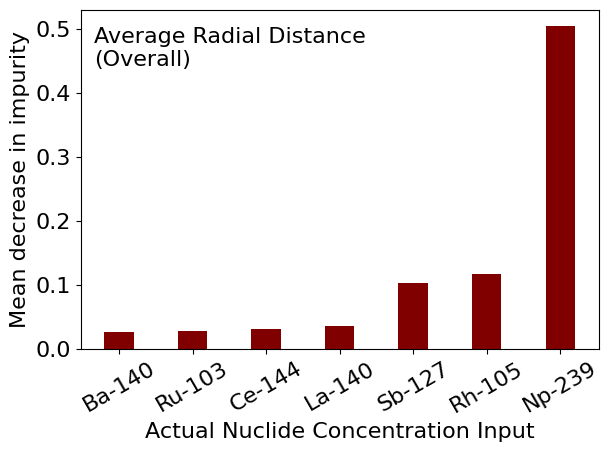

avg_r_dist rfr score (top channels): 0.8565
Index(['Ba-140', 'Ru-103', 'Ce-144', 'La-140', 'Sb-127', 'Rh-105', 'Np-239'], dtype='object')
passes score: 0.9976557034335127


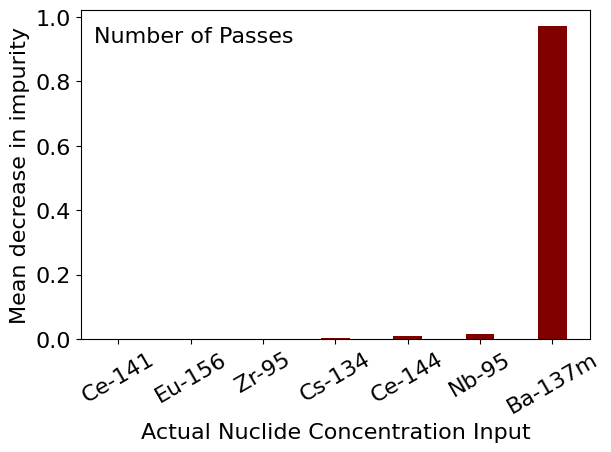

passes rfr score (top channels): 0.9983
Index(['Ce-141', 'Eu-156', 'Zr-95', 'Cs-134', 'Ce-144', 'Nb-95', 'Ba-137m'], dtype='object')
residence_time score: 0.9977699341363194


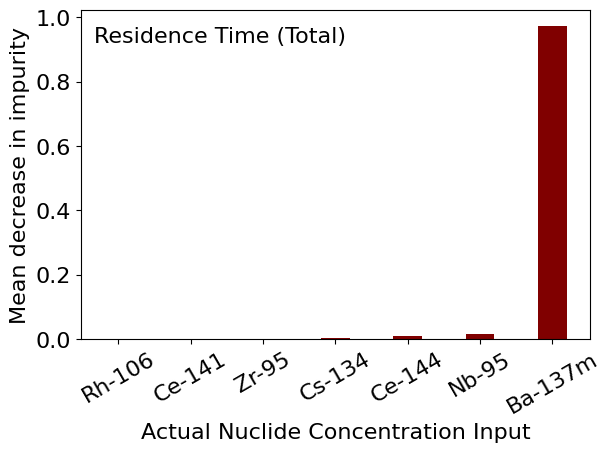


KeyboardInterrupt



In [22]:
top_feature_dict = {}

all_top_isotopes = []
num_top_isotopes = 7




for target_label in target_raw.columns:
    
    rfr_model = RandomForestRegressor(random_state=0)
    rfr_model.set_params(**feature_finding_params)
    rfr_model.fit(training_data, training_target[target_label])
    rfr_model_test_score = rfr_model.score(testing_data, testing_target[target_label])
    print(f"{target_label} score: {rfr_model_test_score}")

    feature_labels = training_data.columns
    importances = rfr_model.feature_importances_
    
    indices = np.argsort(importances)[-num_top_isotopes:]
    top_importance_vals = importances[indices]
    top_features = feature_labels[indices]
    top_feature_dict[target_label] = top_features
    all_top_isotopes += list(top_features)

    title = rename_dictionary[target_label]
    #plt.title(f"Nuclide Importance for {title}")

    fig, ax = plt.subplots()
    
    plt.xlabel("Actual Nuclide Concentration Input")
    plt.ylabel("Mean decrease in impurity")
    
    plt.bar(top_features[0:10], top_importance_vals[0:10], color ='maroon', 
            width = 0.4)
    plt.xticks(rotation=30)
    
    plt.text(0.025, 0.95, title, transform=ax.transAxes, horizontalalignment="left", va="top")
    plt.tight_layout()
    plt.savefig(f"feature_importance/{target_label}_ideal_importances.png")
    plt.show()
    

    rfr_model = RandomForestRegressor(random_state=0)
    rfr_model.set_params(**best_params)
    rfr_model.fit(training_data[top_features], training_target[target_label])
    rfr_model_test_score = rfr_model.score(testing_data[top_features], testing_target[target_label])
    #conc_rfr_accuracy[target_label] = rfr_model_test_score
    print(f"{target_label} rfr score (top channels): {round(rfr_model_test_score,4)}")
    print(feature_labels[indices])

# Notes:
- Xe-131m's 30 keV gammas overlap with too many other gammas, it's higher energy gamma overshadowed by 164.6100 from U-237
- 

## Test performance of selected nuclides using actual concentrations

In [ ]:
chosen_nuclides = ["Np-239", "Ba-137m", "Ce-144", "La-140", "Pm-148m"]

actual_conc_r2_vals = {}

for target_label in target_raw.columns:
    
    rfr_model = RandomForestRegressor(random_state=0)
    rfr_model.set_params(**best_params)
    rfr_model.fit(training_data[chosen_nuclides], training_target[target_label])
    rfr_model_test_score = round(rfr_model.score(testing_data[chosen_nuclides], testing_target[target_label]), 4)
    actual_conc_r2_vals[target_label] = rfr_model_test_score
    #conc_rfr_accuracy[target_label] = rfr_model_test_score
    print(f"{target_label} rfr score  {rfr_model_test_score}")
    


# Assessing individual gamma meassurement feasibility 


## List gammas from parent nucleus

In [15]:
nuclide_to_check = "Np-239"
example_emission_data.sort_values(["intensity"], ascending=False)[example_emission_data["isotope"]==nuclide_to_check]

/tmp/ipykernel_84375/991343547.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example_emission_data.sort_values(["intensity"], ascending=False)[example_emission_data["isotope"]==nuclide_to_check]


,energy,intensity,isotope
961,550.2700,6.721607e+10,Pm-148m
962,629.9700,6.305448e+10,Pm-148m
963,725.7000,2.326710e+10,Pm-148m
964,1013.8090,1.437011e+10,Pm-148m
965,414.0700,1.322252e+10,Pm-148m
966,915.3300,1.216321e+10,Pm-148m
967,288.1099,8.896982e+09,Pm-148m
968,599.7400,8.884371e+09,Pm-148m
969,501.2600,4.779529e+09,Pm-148m
970,611.2600,3.884156e+09,Pm-148m


# See gammas interfering for a specific energy resolution

In [342]:
energy_resolution = 30E-3
order = 1
first_order_energy = 106.123	
min_threshold = 1E4
center_energy = first_order_energy*order
energy_width = center_energy*energy_resolution
lower_bound = center_energy - energy_width
upper_bound = center_energy + energy_width
print(f"\nOrder {order}: {round(center_energy, 2)} ({round(lower_bound,2)} - {round(upper_bound,2)})")

filtered_gammas = example_emission_data[
(example_emission_data["energy"]<upper_bound) & 
(lower_bound < example_emission_data["energy"]) &
(min_threshold < example_emission_data["intensity"]) ]

sorted_gammas = filtered_gammas.sort_values(["intensity"], ascending=False)

sorted_gammas["energy_difference"] = np.abs(sorted_gammas["energy"]-center_energy)/center_energy*100

display(sorted_gammas)

print(display(sorted_gammas["energy"].iloc[:5]*1000))



Order 1: 106.12 (102.94 - 109.31)


,energy,intensity,isotope,energy_difference
1,106.1230,1.965903e+12,Np-239,1.339093e-14
2,103.3740,1.561745e+12,Np-239,2.590390e+00
564,103.1801,3.123343e+10,Sm-153,2.773103e+00
1099,104.8400,2.384844e+09,Pm-151,1.208974e+00
2572,105.3082,1.556136e+08,Eu-155,7.677883e-01
1485,103.3739,1.074547e+08,Np-238,2.590485e+00
399,102.9800,4.948681e+07,U-237,2.961658e+00
846,103.3000,4.203645e+07,Te-131m,2.660121e+00
867,104.9999,2.452126e+07,Te-131m,1.058300e+00
2565,102.9999,1.605999e+07,Sm-156,2.942906e+00


1       106123.0
2       103374.0
564     103180.1
1099    104840.0
2572    105308.2
Name: energy, dtype: float64

None


# Make Energy Resolution Tradeoff Plot for First Order Diffraction

In [18]:
target_isotope = nuclide_to_check

min_threshold = 1E2 # 1.171339e+15*0.01

energy_resolution_grid = np.logspace(-4, -1.5, 1000)
pollution_factor_list = []




for energy_resolution in energy_resolution_grid:
    sorted_df_list = []
    order = 1
    center_energy = first_order_energy*order
    energy_width = center_energy*energy_resolution
    lower_bound = center_energy - energy_width
    upper_bound = center_energy + energy_width
    #print(f"\nOrder {order}: {round(center_energy, 2)} ({round(lower_bound,2)} - {round(upper_bound,2)})")
    
    filtered_gammas = example_emission_data[
    (example_emission_data["energy"]<upper_bound) & 
    (lower_bound < example_emission_data["energy"]) &
    (min_threshold < example_emission_data["intensity"]) ]

    sorted_gammas = filtered_gammas.sort_values(["intensity"], ascending=False)

    sorted_gammas["energy_difference"] = np.abs(sorted_gammas["energy"]-center_energy)/center_energy*100
    sorted_df_list += [sorted_gammas]
    merged_df = pd.concat(sorted_df_list)
    target_index = merged_df[ (np.isclose(merged_df["energy"], first_order_energy) ) & 
        (merged_df["isotope"] == target_isotope) ].index
    most_intense_gamma = merged_df["intensity"].loc[target_index]
    leftover_gamma_df = merged_df.drop(index=target_index)
    noise_gammas = leftover_gamma_df["intensity"].sum()
    pollution_factor = noise_gammas/most_intense_gamma
    pollution_factor_list += [pollution_factor]
    

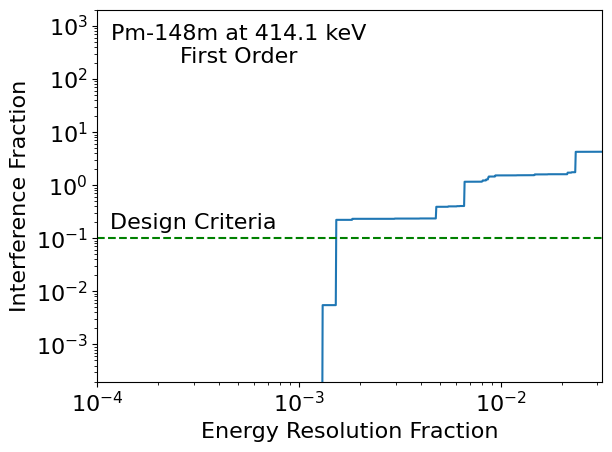

In [19]:
plt.figure()
plt.plot(energy_resolution_grid, pollution_factor_list)
plt.xscale("log")
plt.xlabel("Energy Resolution Fraction")
plt.ylabel("Interference Fraction")
plt.yscale("log")
plt.plot( [energy_resolution_grid[0], energy_resolution_grid[-1]],
        [0.1, 0.1], "g--")
plt.text(3E-4, 1.5E-1, "Design Criteria", ha="center")
plt.ylim(2E-4, 2E3)
plt.xlim(energy_resolution_grid[0], energy_resolution_grid[-1])
label = f"{target_isotope} at {round(first_order_energy,1)} keV"
plt.text(5E-4, 20E1, label+"\nFirst Order", ha="center")
plt.tight_layout()
plt.savefig(f"energy_res_plots/{target_isotope}-{round(first_order_energy,1)}keV_energy_res_1st.png")
plt.show()

# Make Energy Resolution Tradeoff Plot for All Order Diffraction

In [ ]:


pollution_factor_list = []


for energy_resolution in energy_resolution_grid:
    sorted_df_list = []
    for order in range(1, 4+1):
        center_energy = first_order_energy*order
        energy_width = center_energy*energy_resolution
        lower_bound = center_energy - energy_width
        upper_bound = center_energy + energy_width
    
        #print(f"\nOrder {order}: {round(center_energy, 2)} ({round(lower_bound,2)} - {round(upper_bound,2)})")
        
        filtered_gammas = example_emission_data[
        (example_emission_data["energy"]<upper_bound) & 
        (lower_bound < example_emission_data["energy"]) &
        (min_threshold < example_emission_data["intensity"]) ]
    
        sorted_gammas = filtered_gammas.sort_values(["intensity"], ascending=False)
    
        sorted_gammas["energy_difference"] = np.abs(sorted_gammas["energy"]-center_energy)/center_energy*100
        sorted_df_list += [sorted_gammas]
    merged_df = pd.concat(sorted_df_list)
    target_index = merged_df[ (np.isclose(merged_df["energy"], first_order_energy) ) & 
        (merged_df["isotope"] == target_isotope) ].index
    most_intense_gamma = merged_df["intensity"].loc[target_index]
    leftover_gamma_df = merged_df.drop(index=target_index)

    noise_gammas = leftover_gamma_df["intensity"].sum()
    pollution_factor = noise_gammas/most_intense_gamma
    pollution_factor_list += [pollution_factor]
    

In [ ]:
plt.figure()
plt.plot(energy_resolution_grid, pollution_factor_list)
plt.xscale("log")
plt.xlabel("Energy Resolution Fraction")
plt.ylabel("Interference Fraction")
plt.yscale("log")
plt.ylim(2E-4, 2E3)
plt.plot( [energy_resolution_grid[0], energy_resolution_grid[-1]],
        [0.1, 0.1], "g--")
plt.text(3E-4, 1.5E-1, "Design Criteria", ha="center")
plt.xlim(energy_resolution_grid[0], energy_resolution_grid[-1])
label = f"{target_isotope} at {round(first_order_energy,1)} keV"
plt.text(5E-4, 20E1, label+"\nAll Orders", ha="center")
plt.tight_layout()
plt.savefig(f"energy_res_plots/{target_isotope}-{round(first_order_energy,1)}keV_energy_res_all.png")
plt.show()

# Incorporate SHADOW results

Create a filter data dictionary that contains absolute efficiency and curves

In [29]:
filter_dict = {}

In [30]:
energy_center = 661.6569
nuclide = "Ba-137m"
nuclide_raw = r"$^{137m}$Ba"

source_efficiency = 6.03145E-08
crystal_efficiency = 0.039336618
detector_efficiency = 0.407304

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "filter_data/Ba137m_hpge90mm_020fwhm.csv" #"filter_data/ba137m_hpge2x2_5mm_005fwhm.csv"
details = r"440_020fwhm"
crystal_label = r"0.02$\degree$ FWHM"+"\nSi (440)"
fwhm = 37799.9947

plot_max = 8e3

plot_width_modifier =  1.5


In [57]:
energy_center = 661.6569
nuclide = "Ba-137m"
nuclide_raw = r"$^{137m}$Ba"

source_efficiency = 6.03145E-08
crystal_efficiency = 0.024826361
detector_efficiency = 0.407816

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "filter_data/Ba137m_hpge90mm_0.005fwhm.csv" #"filter_data/ba137m_hpge2x2_5mm_005fwhm.csv"
details = r"440_0.005fwhm"
crystal_label = r"0.005$\degree$ FWHM"+"\nSi (440)"
fwhm = 18599.9842

plot_max = 8e3

plot_width_modifier =  1.5


In [330]:
energy_center = 106.123
nuclide = "Np-239"
nuclide_raw = r"$^{239}$Np"

source_efficiency = 3.63759E-08
crystal_efficiency = 0.061415862
detector_efficiency = 0.961898

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "filter_data/np239_bgo1x1_5mm_008fwhm.csv" #"filter_data/ba137m_hpge2x2_5mm_005fwhm.csv"
details = r"220_0.008fwhm"
crystal_label = r"0.008$\degree$ FWHM"+"\nSi (220)"
fwhm = 1679.9991

plot_max = 8e3

plot_width_modifier =  2.5


In [311]:
energy_center = 133.5149
nuclide = "Ce-144"
nuclide_raw = r"$^{144}$Ce"

source_efficiency = 2.90069E-08
crystal_efficiency = 0.017890507
detector_efficiency = 0.974808

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "filter_data/ce144_bgo2x2_5mm_030fwhm.csv" 
details = r"440_0.03fwhm"
crystal_label = r"0.03$\degree$ FWHM"+"\nSi (440)"
fwhm = 2519.9997

plot_max = 8e3

plot_width_modifier =  1.5


In [287]:
energy_center = 414.07
nuclide = "Pm-148m"
nuclide_raw = r"$^{148m}$Pm"

source_efficiency = 5.52063E-08
crystal_efficiency = 0.025868166
detector_efficiency = 0.786457

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "filter_data/pm148m_bgo2x2_5mm_005fwhm.csv" 
details = r"440_0.005fwhm"
crystal_label = r"0.005$\degree$ FWHM"+"\nSi (440)"
fwhm = 8639.9937

plot_max = 8e3

plot_width_modifier =  2.5


In [58]:

overlap_line = fwhm*0.05/1000

processing_energy_width = fwhm/1000*2.5
lower_bound = energy_center-processing_energy_width
upper_bound = energy_center+processing_energy_width

plot_width_fraction = plot_width_modifier*fwhm/energy_center/1000
plot_width = energy_center*plot_width_fraction
lower_plot_bound = energy_center-plot_width
upper_plot_bound = energy_center+plot_width

In [59]:
def read_bandpass_filter(file_name):
    data = pd.read_csv(file_name)
    energy = data[' Energy [eV]']/1000
    counts = data['Number of Rays weighted by $\Vert\mathbf{E_{\sigma}}+\mathbf{E_{\pi}}\Vert^2$']
    energy_step = energy.iloc[1] - energy.iloc[0]
    energy = np.insert(energy, 0, energy[0]-energy_step)
    energy = np.append(energy, energy[-1]+energy_step)
    
    counts = np.insert(counts, 0, 0)
    counts = np.append(counts, 0)

    return pd.DataFrame({"energy":energy, "counts": counts})


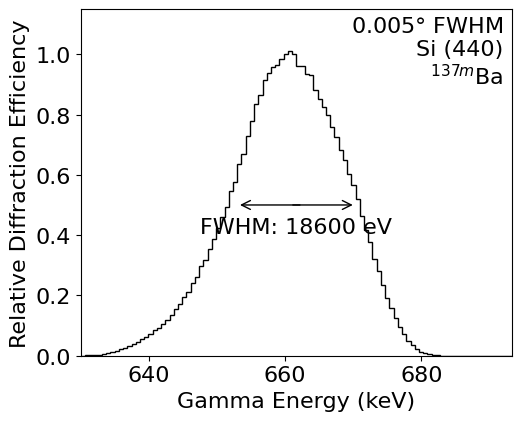

In [60]:
from scipy.interpolate import interp1d



filter_data = read_bandpass_filter(filter_file)




energy=filter_data["energy"]
centroid_index = energy.iloc[(energy-energy_center).abs().argsort()].index[0]

counts = filter_data["counts"]
counts_norm = counts/counts.iloc[centroid_index]

filter_energy = energy
filter_counts = counts_norm

bar_width = (energy[1]-energy[0])

energy_steps = energy - bar_width
energy_steps = energy_steps.tolist()
energy_steps += [energy.iloc[-1]+bar_width]


# Find the x-values where y is approximately half_max_y
# (This step might require more robust search for multiple peaks or noisy data)
indices_above_half_max = np.where(counts_norm >= 0.5)[0]
left_idx = indices_above_half_max[1]
right_idx = indices_above_half_max[-4]


# 5. Calculate FWHM
#fwhm = round(1000*energy.iloc[indices_above_half_max[-1]] - 1000*energy.iloc[indices_above_half_max[0]])




fig, ax = plt.subplots(figsize=(5.5, 4.5) )

# 6. Plot the Data and FWHM

arrow_dict = dict(arrowstyle="->")

#plt.plot([energy.iloc[left_idx], energy.iloc[right_idx]], [0.5, 0.5], linestyle="dotted")
plt.annotate("", (energy.iloc[right_idx], 0.5), (energy_center-overlap_line, 0.5),arrowprops=arrow_dict) 
plt.annotate("", (energy.iloc[left_idx], 0.5), (energy_center+overlap_line, 0.5),arrowprops=arrow_dict) 
#plt.axhline(0.5, color='red', linestyle='--', label='Half Maximum')
#plt.axvline(x_fwhm_left, color='green', linestyle=':', label='FWHM Points')
#plt.axvline(x_fwhm_right, color='green', linestyle=':')
plt.text(0.5, 0.4, f"FWHM: {round(fwhm)} eV", ha="center", va="top", transform = ax.transAxes)
plt.text(0.98, 0.98, f"{crystal_label}\n{nuclide_raw}", ha="right", va="top", transform = ax.transAxes)
plt.stairs(counts_norm, edges=energy_steps, linewidth=1, linestyle="-", edgecolor="black")
plt.xlabel("Gamma Energy (keV)")
plt.xlim(energy.iloc[0], energy.iloc[-1])
plt.ylim(0,1.15)
plt.ylabel("Relative Diffraction Efficiency")
plt.tight_layout()
#plt.savefig(f"figures/filter_plots/{nuclide}_{details}_filter.png")
plt.show()

In [61]:
key = f"{nuclide}-{details}"
filter_dict[key] = {}
filter_dict[key]["filter_energy"] = list(filter_energy)
filter_dict[key]["filter_count"] = list(filter_counts)
filter_dict[key]["fwhm"] = fwhm
filter_dict[key]["crystal_label"] = crystal_label
filter_dict[key]["absolute_efficiency"] = absolute_efficiency
filter_dict[key]["detector_efficiency"] = detector_efficiency
filter_dict[key]["crystal_efficiency"] = crystal_efficiency
filter_dict[key]["source_efficiency"] = source_efficiency


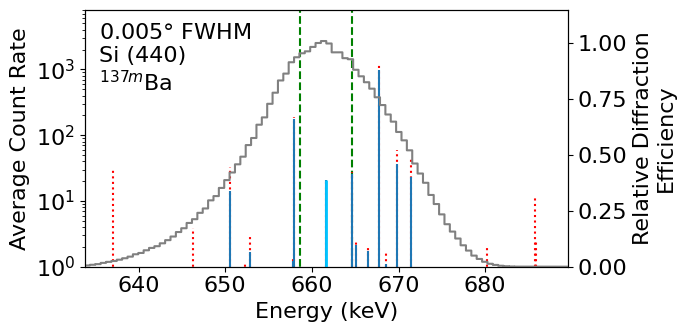

In [62]:
do_legend = False

do_hpge_lines = True
target_count_list = []
noise_count_list = []

hpge_fwhm = 2
hpge_lower = 661.6569 - hpge_fwhm*1.5
hpge_higher = 661.6569 + hpge_fwhm*1.5

gspec_df_filtered = example_emission_data.copy() #gspec_df_list[peb_id].copy()
gspec_df_filtered = gspec_df_filtered[ (lower_bound < gspec_df_filtered["energy"]) &  (gspec_df_filtered["energy"] < upper_bound)]
gspec_df_filtered["efficiency"] = np.interp(gspec_df_filtered["energy"], filter_energy, filter_counts, left=0, right=0)
gspec_df_filtered = gspec_df_filtered.sort_values("energy")
gspec_df_filtered["avg_countrate"] = gspec_df_filtered["intensity"]*absolute_efficiency*gspec_df_filtered["efficiency"]

target_index = (gspec_df_filtered["isotope"] == nuclide) & (np.abs(energy_center - gspec_df_filtered["energy"]) < 0.001) 
target_counts = gspec_df_filtered["avg_countrate"].loc[target_index].sum()


if do_hpge_lines:
    noise_index = (~target_index) & (hpge_lower < gspec_df_filtered["energy"]) & (gspec_df_filtered["energy"] < hpge_higher)
    noise_counts = gspec_df_filtered["avg_countrate"].loc[noise_index].sum()
else:
    noise_counts = gspec_df_filtered["avg_countrate"].loc[~target_index].sum()

target_count_list += [target_counts]
noise_count_list += [noise_counts]

abs_weighted = absolute_efficiency*gspec_df_filtered["intensity"]
filter_weighted = abs_weighted*gspec_df_filtered["efficiency"]

try:
    max_weighted = max(abs_weighted)
except:
    max_weighted = 0
fig, ax1 = plt.subplots(figsize=(7,3.6) )
ln1 = ax1.vlines(gspec_df_filtered["energy"], 1e-11, abs_weighted, linestyle="dotted", color="red", label="Emitted")
ln2 = ax1.vlines(gspec_df_filtered["energy"], 0, filter_weighted, label="Measured")


ax1.vlines(energy_center, 0, target_counts, color="#00c3ff", linewidth=2, zorder=10)

if do_hpge_lines:
    ln4 = ax1.vlines([hpge_lower, hpge_higher], 0, plot_max, linestyle="dashed", color="green", label=r"1.5$\times$"+"HPGe\nFWHM", zorder=-1)

ax1.set_xlim(lower_plot_bound, upper_plot_bound)
ax1.set_ylim(1, plot_max)
ax1.set_xlabel("Energy (keV)")
ax1.set_ylabel("Average Count Rate")
ax1.set_yscale("log")

ax2 = ax1.twinx() 
ln3 = ax2.plot(filter_energy, filter_counts, color="gray", label="Filter")
ax2.set_ylabel("Relative Diffraction\nEfficiency")
ax2.set_ylim(0,1.15)

if do_hpge_lines:
    lns = [ln1, ln2, ln4]
else:
    lns = [ln1, ln2]
labs = [l.get_label() for l in lns]
lns += [ln3[0]]
labs += [ln3[0].get_label()]


plt.tight_layout()
bu_str = f"{crystal_label}\n{nuclide_raw}"
ax1.text(0.03, 0.95, bu_str, ha='left', verticalalignment='top', transform = ax1.transAxes)
if do_legend:
    ax1.legend(lns, labs, loc="upper right")
    plt.savefig(f"figures/filtered_spectra_plots/filtered_spectrum_{nuclide}_{details}_legend.png")
else:
    plt.savefig(f"figures/filtered_spectra_plots/filtered_spectrum_{nuclide}_{details}.png")
plt.show()



In [63]:
filtered_sorted = gspec_df_filtered[gspec_df_filtered["avg_countrate"]>1]
filtered_sorted = filtered_sorted.loc[filtered_sorted["energy"].sort_values(ascending=True).index ]


In [64]:
file_name = f"{details}_gadras.gam"
filtered_copy = filtered_sorted[ ["energy", "avg_countrate"] ].copy()

num_lens = len(filtered_copy)

with open(file_name, "w") as f:
    f.write(f"{num_lens}  {num_lens}")
    for index, row in filtered_copy.iterrows():
        line_str = f"\n   {round(row.values[0], 4)}    {round(row.values[1], 4)} "
        f.write(line_str)
    

In [23]:
hpge_filterable_peaks = [
(661.6569, "Ba-137m"),
(667.7140, "I-132"),
(657.9400, "Nb-97"),
(664.5709, "Ce-143"),
(636.9890, "I-131")
]

In [351]:
filter_dict['Ba-137m-440_0.02fwhm']["energy_center"]=661.6569
filter_dict['Ba-137m-440_0.005fwhm']["energy_center"]=661.6569
filter_dict['Ce-144-440_0.03fwhm']["energy_center"]=133.5149
filter_dict['Pm-148m-440_0.005fwhm']["energy_center"]=414.07
filter_dict['Np-239-220_0.008fwhm']["energy_center"]=106.123

In [352]:
with open(f"filter_data/filter_dict.json","w") as f:
    f.write(json.dumps(filter_dict))

# Apply Filters


In [24]:
with open(f"filter_data/filter_dict.json","r") as f:
    filter_dict = json.load(f)


In [25]:
top4_params = {'bootstrap': True, 
                   'ccp_alpha': 0.0, 
                   'max_depth': 10, 
                   'max_features': 1.0, 
                   'max_leaf_nodes': None, 
                   'max_samples': None, 
                   'min_impurity_decrease': 0.0, 
                   'min_samples_leaf': 1, 
                   'min_samples_split': 2, 
                   'min_weight_fraction_leaf': 0.0, 
                   'n_estimators': 400, 
                   'n_jobs': 8,
                   'oob_score': False, 
                   'random_state': 0, 
                   'verbose': 0, 
                   'warm_start': False}


In [27]:
target_raw = pd.read_csv("top4_targets.csv", index_col=0)

In [27]:
directory = "/global/scratch/users/ikolaja/pebble_outward_current/decay_runs"
count_data = []
step_list = [225, 235, 245, 255, 265, 275, 285, 295]


la140_setup = {"type": "NaI",
               "distance": 3.00,
               "energy": 1596.209,
               "intrinsic_efficiency": 0.1,
               "collimator_diameter": 0.5 / 100
                }


emissions_data = []





day = "1.5"
for step in step_list:
    print(f"Step {step}")
    num_pebs = int(len(target_raw)/8)
    for i in range(num_pebs):
        if i%100 == 0:
            print(f"{i} of {num_pebs}")
        peb_spectrum = read_single_gspec_individual(f"{directory}/{step}/decay_{i}_step2_{day}d.serpent_gsrc.m")
        emissions_data += [peb_spectrum]
        
        peb_spectrum = peb_spectrum.sort_values("energy")
        peb_data = {}

        

        for key in filter_dict.keys():
            gspec_df_filtered = peb_spectrum.copy() 
            
            splitkey = key.split("-")
            current_filter = filter_dict[key]
            if "Ba" in key:
                is_hpge = True
            else:
                is_hpge = False
            nuclide = splitkey[0]+"-"+splitkey[1]
            absolute_efficiency = current_filter["absolute_efficiency"]
            filter_energy = current_filter["filter_energy"]
            filter_counts = current_filter["filter_count"]
            energy_center = current_filter["energy_center"]

            lower_bound = filter_energy[0]
            upper_bound = filter_energy[-1]
            gspec_df_filtered = gspec_df_filtered[ (lower_bound < gspec_df_filtered["energy"]) &  (gspec_df_filtered["energy"] < upper_bound)]
            gspec_df_filtered["efficiency"] = np.interp(gspec_df_filtered["energy"], filter_energy, filter_counts, left=0, right=0)
            gspec_df_filtered = gspec_df_filtered.sort_values("energy")
            gspec_df_filtered["avg_countrate"] = gspec_df_filtered["intensity"]*absolute_efficiency*gspec_df_filtered["efficiency"]

            #gspec_df_filtered["sampled_counts"] = np.random.poisson(gspec_df_filtered["avg_countrate"]*measurement_time)
            
            target_index = (gspec_df_filtered["isotope"] == nuclide) & (np.abs(energy_center - gspec_df_filtered["energy"]) < 0.001) 
            target_counts = gspec_df_filtered["avg_countrate"].loc[target_index].sum()


            if is_hpge:
                fwhm = key.split("_")[-1]
                for peak_ind in range(len(hpge_filterable_peaks)):
                    hpge_peak_energy = hpge_filterable_peaks[peak_ind][0]
                    hpge_peak_nuclide = hpge_filterable_peaks[peak_ind][1]
                    hpge_index = np.abs(hpge_peak_energy - gspec_df_filtered["energy"]) < 0.001
                    peak_label = f"hpge_{hpge_peak_nuclide}_{round(hpge_peak_energy,2)}_{fwhm}"
                    peb_data[peak_label] = gspec_df_filtered["avg_countrate"].loc[hpge_index].sum()
            else:
                
                peb_data[f"current_{nuclide}_{energy_center}"] = gspec_df_filtered["avg_countrate"].sum()
            

        la140_emissions = peb_spectrum["intensity"].loc[( np.abs(peb_spectrum["energy"]-1596.209) < 0.1) & (peb_spectrum["isotope"] == "La-140")]
        la140_rate, sampled_counts, unc = measure_single_gamma(la140_emissions, la140_setup["distance"], la140_setup["collimator_diameter"], intrinsic_efficiency = la140_setup["intrinsic_efficiency"], print_results = False)      
        peb_data["La140_scintillator"] = la140_rate.iloc[0]
        
        count_data += [peb_data]


Step 225
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 1968
1800 of 1968
1900 of 1968
Step 235
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 1968
1800 of 1968
1900 of 1968
Step 245
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 1968
1800 of 1968
1900 of 1968
Step 255
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 196

In [28]:
gamma_data = pd.DataFrame(count_data)
gamma_data = gamma_data.fillna(0.0)
display(gamma_data)
gamma_data.to_csv("serpent_bcd_spectrometer_average_countrates.csv")

,hpge_Ba-137m_661.66_0.02fwhm,hpge_I-132_667.71_0.02fwhm,hpge_Nb-97_657.94_0.02fwhm,hpge_Ce-143_664.57_0.02fwhm,hpge_I-131_636.99_0.02fwhm,hpge_Ba-137m_661.66_0.005fwhm,hpge_I-132_667.71_0.005fwhm,hpge_Nb-97_657.94_0.005fwhm,hpge_Ce-143_664.57_0.005fwhm,hpge_I-131_636.99_0.005fwhm,current_Ce-144_133.5149,current_Pm-148m_414.07,current_Np-239_106.123,La140_scintillator
0,57.750539,1372.663475,222.084493,29.305579,14.748214,37.117227,751.357467,132.007641,18.308937,0.618969,14.263881,27.892732,5874.210805,40116.171552
1,28.233589,1663.154565,287.939133,39.242282,18.163017,18.146195,910.364139,171.151822,24.516987,0.762285,11.986842,25.587492,4422.641308,56863.039385
2,32.605409,1649.409750,254.380082,36.602507,18.675173,20.956036,902.840613,151.204229,22.867762,0.783780,12.771371,21.518080,3217.579951,57396.695057
3,33.354118,1802.046012,328.410554,43.662696,18.824982,21.437244,986.389420,195.208147,27.278682,0.790067,13.100003,28.668550,5843.549867,56510.270958
4,43.220254,1533.649880,262.782486,35.386488,16.189544,27.778373,839.476908,156.198641,22.108043,0.679460,13.978782,28.925226,4505.112182,46989.747806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15739,58.304183,1362.782206,224.478424,29.404888,14.634409,37.473064,745.948738,133.430600,18.370982,0.614192,15.025738,25.862104,4995.544191,40234.005003
15740,18.732434,1853.920085,316.413616,44.083426,20.464570,12.039645,1014.783831,188.077134,27.541537,0.858879,9.131444,23.755541,4754.726354,64831.709147
15741,27.775043,1811.028015,299.476645,42.047457,19.432164,17.851480,991.305916,178.009751,26.269546,0.815550,11.980669,25.945095,5603.589371,59812.630917
15742,18.280585,2128.407263,396.044468,53.111638,22.322971,11.749235,1165.030410,235.409934,33.181998,0.936874,9.093623,29.558594,4258.661926,68842.541757


## Enter here if you want to skip data generation

In [16]:
target_raw = pd.read_csv("top4_targets.csv", index_col=0)
count_rates = pd.read_csv("serpent_bcd_spectrometer_average_countrates.csv", index_col=0)
measurement_time = 20.0
display(count_rates[:5])


sampled_counts = count_rates*measurement_time

sampled_counts = sampled_counts.map(lambda x: np.random.poisson(x))
display(sampled_counts[:5])

,hpge_Ba-137m_661.66_0.02fwhm,hpge_I-132_667.71_0.02fwhm,hpge_Nb-97_657.94_0.02fwhm,hpge_Ce-143_664.57_0.02fwhm,hpge_I-131_636.99_0.02fwhm,hpge_Ba-137m_661.66_0.005fwhm,hpge_I-132_667.71_0.005fwhm,hpge_Nb-97_657.94_0.005fwhm,hpge_Ce-143_664.57_0.005fwhm,hpge_I-131_636.99_0.005fwhm,current_Ce-144_133.5149,current_Pm-148m_414.07,current_Np-239_106.123,La140_scintillator
0,57.750539,1372.663475,222.084493,29.305579,14.748214,37.117227,751.357467,132.007641,18.308937,0.618969,14.263881,27.892732,5874.210805,40116.171552
1,28.233589,1663.154565,287.939133,39.242282,18.163017,18.146195,910.364139,171.151822,24.516987,0.762285,11.986842,25.587492,4422.641308,56863.039385
2,32.605409,1649.409750,254.380082,36.602507,18.675173,20.956036,902.840613,151.204229,22.867762,0.783780,12.771371,21.518080,3217.579951,57396.695057
3,33.354118,1802.046012,328.410554,43.662696,18.824982,21.437244,986.389420,195.208147,27.278682,0.790067,13.100003,28.668550,5843.549867,56510.270958
4,43.220254,1533.649880,262.782486,35.386488,16.189544,27.778373,839.476908,156.198641,22.108043,0.679460,13.978782,28.925226,4505.112182,46989.747806


,hpge_Ba-137m_661.66_0.02fwhm,hpge_I-132_667.71_0.02fwhm,hpge_Nb-97_657.94_0.02fwhm,hpge_Ce-143_664.57_0.02fwhm,hpge_I-131_636.99_0.02fwhm,hpge_Ba-137m_661.66_0.005fwhm,hpge_I-132_667.71_0.005fwhm,hpge_Nb-97_657.94_0.005fwhm,hpge_Ce-143_664.57_0.005fwhm,hpge_I-131_636.99_0.005fwhm,current_Ce-144_133.5149,current_Pm-148m_414.07,current_Np-239_106.123,La140_scintillator
0,1134,27151,4506,568,288,762,14867,2704,349,12,312,570,117256,803621
1,507,33368,5634,778,337,370,18253,3397,490,11,245,536,88571,1136028
2,660,33037,5054,722,368,443,18092,3002,426,23,252,440,64311,1147391
3,673,35806,6516,858,373,425,19706,3906,515,23,228,571,116847,1131168
4,866,30848,5324,678,315,555,16669,3094,401,10,274,584,89927,939255


In [41]:
used_fwhm = "0.02fwhm"

drop_fwhm = "0.005fwhm"
drop_columns = []
for header in sampled_counts.columns:
    if drop_fwhm in header:
        drop_columns += [header]

In [42]:
gamma_data = sampled_counts.drop(columns=drop_columns)

In [43]:
train_split = 0.8

data_raw = gamma_data


def standardize(raw_data, mean=None, std=None, axis=0):
    if mean is None:
        mean = np.mean(raw_data, axis = axis)
    if std is None:
        std = np.std(raw_data, axis = axis)
        std[ std==0 ] = 0.1
    result = (raw_data - mean) / std
    return result, mean, std

def unstandardize(standardized_data, mean, std):
    raw_data = (standardized_data*std)+mean
    return raw_data

num_data, _ = np.shape(data_raw)
training_size = int(num_data*train_split)
testing_size = num_data - training_size
data_indices = np.arange(num_data)
training_indices = np.random.choice(num_data, training_size, replace=False)
testing_indices = data_indices[np.in1d(data_indices, training_indices, invert=True)]

top4_training_target, top4_target_mean, top4_target_std = standardize(target_raw.iloc[training_indices])
top4_training_data, top4_data_mean, top4_data_std = standardize(data_raw.iloc[training_indices])

top4_testing_target, _, _  = standardize(target_raw.iloc[testing_indices], mean=top4_target_mean, std=top4_target_std)
top4_testing_data, _, _  = standardize(data_raw.iloc[testing_indices], 
                                         mean=top4_data_mean, std=top4_data_std)


In [44]:
serpent_models = {}
serpent_models_r2_vals = {}

result_table = {}
for target_label in top4_training_target.columns:
    rfr_model = RandomForestRegressor(random_state=0)
    rfr_model.set_params(**top4_params)
    rfr_model.fit(top4_training_data, top4_training_target[target_label])
    serpent_models[target_label] = rfr_model
    rfr_model_predict = rfr_model.predict(top4_testing_data)
    r2_score_val = round(r2_score(rfr_model_predict, top4_testing_target[target_label]),4)
    serpent_models_r2_vals[target_label] = r2_score_val
    mape_score_val = round(mean_absolute_percentage_error(rfr_model_predict, top4_testing_target[target_label])*100,1)
    print(f"{target_label} rfr score (ba137m {used_fwhm}) - r^2: {r2_score_val}, MAPE: {mape_score_val}")
    result_table[target_label] = {"r2_score":r2_score_val,
                                  "mape_score":mape_score_val}



U-235 rfr score (ba137m 0.02fwhm) - r^2: 0.9959, MAPE: 89.9
U-238 rfr score (ba137m 0.02fwhm) - r^2: 0.9818, MAPE: 36.7
Pu-239 rfr score (ba137m 0.02fwhm) - r^2: 0.8872, MAPE: 402.0
Np-239 rfr score (ba137m 0.02fwhm) - r^2: 0.9998, MAPE: 20.2
avg_r_dist rfr score (ba137m 0.02fwhm) - r^2: 0.6632, MAPE: 253.2
passes rfr score (ba137m 0.02fwhm) - r^2: 0.9877, MAPE: 14.5
residence_time rfr score (ba137m 0.02fwhm) - r^2: 0.9879, MAPE: 89.9
burnup rfr score (ba137m 0.02fwhm) - r^2: 0.9953, MAPE: 16.9
fima rfr score (ba137m 0.02fwhm) - r^2: 0.9954, MAPE: 15.2
pass_residence_time rfr score (ba137m 0.02fwhm) - r^2: 1.0, MAPE: 0.0
pass_avg_r_dist rfr score (ba137m 0.02fwhm) - r^2: 0.8838, MAPE: 129.0
pass_fima rfr score (ba137m 0.02fwhm) - r^2: 0.9948, MAPE: 23.0
pass_burnup rfr score (ba137m 0.02fwhm) - r^2: 0.9944, MAPE: 21.8
integrated_flux_pebbles_thermal rfr score (ba137m 0.02fwhm) - r^2: 0.9876, MAPE: 21.6
integrated_flux_pebbles_fast rfr score (ba137m 0.02fwhm) - r^2: 0.9798, MAPE: 34.9
i

In [49]:
table_name = f"{round(assumed_diffraction_efficiency,3)}-{'_'.join(list(top4_training_data.columns))}.json"
with open(f"serpent_bcd_spectrometer_{used_fwhm}fwhm_results.json", 'w') as fp:
    json.dump(result_table, fp)

Pass: 7
True positive: 0.0%
False positive: 0.4%
True negative: 99.6%
False negative: 0.0%


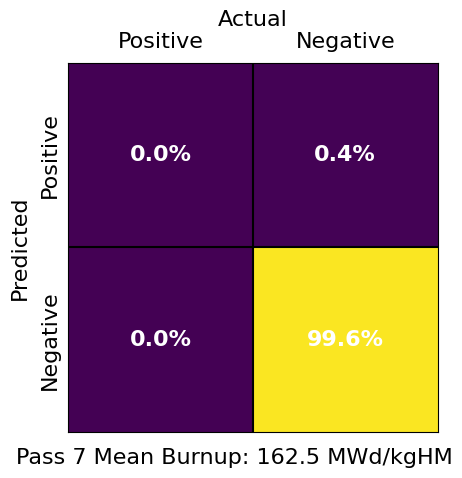

Pass: 8
True positive: 23.4%
False positive: 11.8%
True negative: 55.5%
False negative: 9.3%


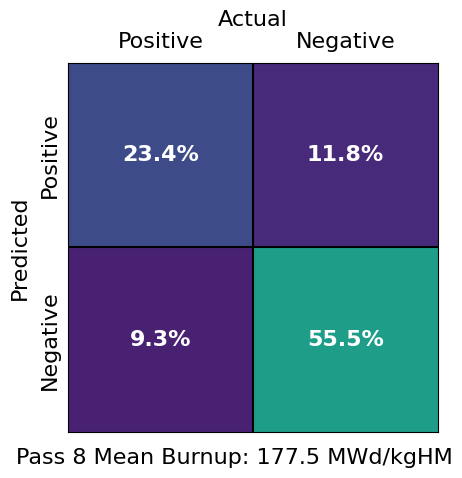

Pass: 9
True positive: 92.3%
False positive: 1.0%
True negative: 2.1%
False negative: 4.6%


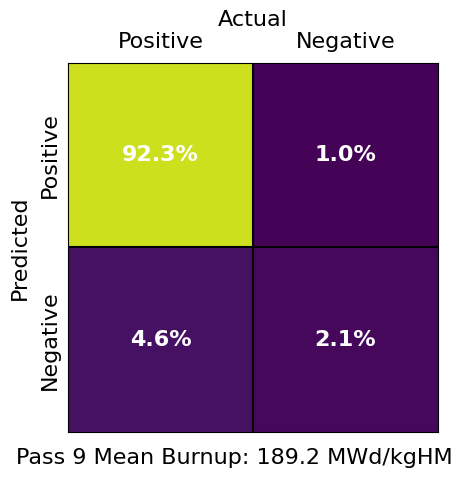

Pass: 10
True positive: 100.0%
False positive: 0.0%
True negative: 0.0%
False negative: 0.0%


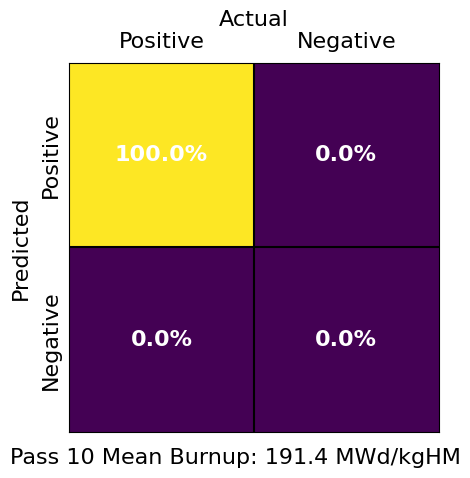

In [53]:
for pass_num in [7,8,9,10]:
    print(f"Pass: {pass_num}")
    last_pass_id = target_raw["passes"] == pass_num
    last_pass_data = data_raw[last_pass_id]
    last_pass_target = target_raw[last_pass_id]
    pass_average_burnup = round(last_pass_target["burnup"].mean(), 1)
    
    last_pass_std_data, _, _  = standardize(last_pass_data, 
                                             mean=top4_data_mean, std=top4_data_std)
    
    
    
    
    last_pass_std_predictions = serpent_models["burnup"].predict(last_pass_std_data)
    last_pass_burnup_predictions = unstandardize(last_pass_std_predictions, top4_target_mean["burnup"], top4_target_std["burnup"])
    last_pass_burnup_actual = last_pass_target["burnup"]
    
    burnup_threshold = 180
    predicted_choice_list = last_pass_burnup_predictions > burnup_threshold
    correct_choice_list = last_pass_burnup_actual > burnup_threshold
    correct_choice_list = correct_choice_list.reset_index(drop=True)
    
    true_negative = 0
    false_negative = 0
    true_positive = 0
    false_positive = 0
    num_samples = len(last_pass_burnup_predictions)
    
    for i in range(num_samples):
        predicted_choice = predicted_choice_list[i]
        correct_choice = correct_choice_list.iloc[i]
        if predicted_choice == True and correct_choice == True:
            true_positive += 1
        if predicted_choice == False and correct_choice == False:
            true_negative += 1
        if predicted_choice == True and correct_choice == False:
            false_positive += 1
        if predicted_choice == False and correct_choice == True:
            false_negative += 1
    
    
    TP = round(true_positive/num_samples*100,1)
    FP = round(false_positive/num_samples*100,1)
    TN = round(true_negative/num_samples*100,1)
    FN = round(false_negative/num_samples*100,1)
    print(f"True positive: {TP}%")
    print(f"False positive: {FP}%")
    print(f"True negative: {TN}%")
    print(f"False negative: {FN}%")


    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    fig,ax = plt.subplots(1)
    ax.imshow(confusion_matrix, vmin=0, vmax=100, 
              extent=[0, 1, 0, 1], 
              origin="upper")
    ax.set_xticks([])
    ax.xaxis.tick_top()
    plt.text(0.75, 0.25, str(TN)+"%", ha="center", va="center", color="white", fontweight="bold")
    plt.text(0.25, 0.75, str(TP)+"%", ha="center", va="center", color="white", fontweight="bold")
    plt.text(0.75, 0.75, str(FP)+"%", ha="center", va="center", color="white", fontweight="bold")
    plt.text(0.25, 0.25, str(FN)+"%", ha="center", va="center", color="white", fontweight="bold")
    plt.text(0.45, -0.07, f"Pass {pass_num} Mean Burnup: {pass_average_burnup} MWd/kgHM", 
             ha="center", va="center", color="black")
    ax.set_yticks([])
    plt.text(-0.05, 0.25, "Negative", va="center", ha="center", rotation="vertical")
    plt.text(-0.05, 0.75, "Positive", va="center", ha="center", rotation="vertical")
    plt.text(0.25, 1.04, "Positive", ha="center")
    plt.text(0.75, 1.04, "Negative", ha="center")
    plt.text(0.5, 1.10, "Actual", ha="center")
    #plt.text(0.4, 1.18, f"Pass {pass_num} Burnup Threshold Accuracy", ha="center", fontweight="bold")
    plt.text(-0.13, 0.5, "Predicted", ha="center", va="center", rotation="vertical")
    plt.plot((0.5,0.5),(0,1.0),"black")
    plt.plot((0,1),(0.5,0.5),"black")
    plt.savefig(f"{used_fwhm}fwhm_confusion_pass{pass_num}_matrix.png")
    plt.show()

# Gamma Heating Study

In [55]:
subdir = "137mBa_divergent"

heating_directory = f"/global/scratch/users/ikolaja/pebble_outward_current/gamma_heating/{subdir}/"
base_file_name = "heating_step<index>.serpent_det0.m"
file_path = heating_directory + base_file_name

In [56]:
0.001125*1000

1.125

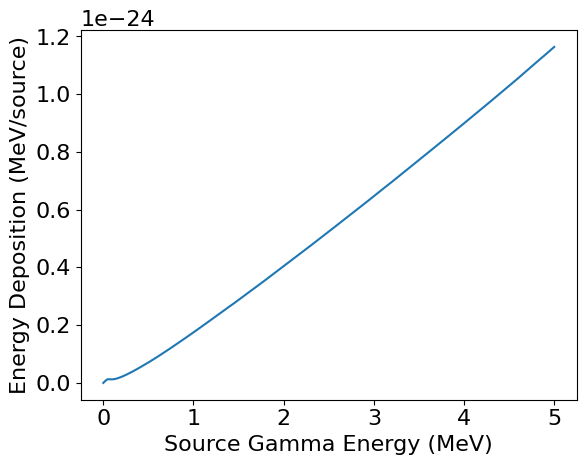

In [58]:
source_grid = np.linspace(0.001125, 3.00, 130)
source_grid2 = np.linspace(3.1, 5, 20)
heating_energy_grid = np.hstack([source_grid, source_grid2])

val_grid = []

for e in range(len(heating_energy_grid)):
    file_path = heating_directory + base_file_name.replace("<index>",str(e))
    with open(file_path, 'r') as f:
        f.readline()
        f.readline()
        line = f.readline()
        val = float(line.split()[10])
    val_grid += [val]

MeV_to_Joules = 1.60218e-13

energy_deposition_curve = np.array(val_grid)*MeV_to_Joules

plt.figure()
plt.plot(heating_energy_grid, energy_deposition_curve )
plt.xlabel("Source Gamma Energy (MeV)")
plt.ylabel("Energy Deposition (MeV/source)")
plt.tight_layout()
plt.savefig("figures/gamma_heating_curve_realistic.png")
plt.show()

In [59]:
escape_efficiency_661 = np.interp(661.6569, transmission_curve["energy"], transmission_curve["efficiency"])
source_efficiency_661 = 6.03145E-08

In [60]:
directory = "/global/scratch/users/ikolaja/pebble_outward_current/decay_runs"
count_data = []
step_list = [225, 235, 245, 255, 265, 275, 285, 295]


gamma_heating_list = []
heating_dataframe_list = []

day = "1.5"
for step in step_list:
    print(f"Step {step}")
    num_pebs = 100 #int(len(target_raw)/8)
    for i in range(num_pebs):
        if i%100 == 0:
            print(f"{i} of {num_pebs}")
        peb_spectrum = read_single_gspec_individual(f"{directory}/{step}/decay_{i}_step2_{day}d.serpent_gsrc.m")
        peb_spectrum = peb_spectrum.sort_values("energy")

        peb_spectrum["escape_efficiency"] = np.interp(peb_spectrum["energy"], transmission_curve["energy"], transmission_curve["efficiency"])
        peb_spectrum["adjusted_source_efficiency"] = source_efficiency_661*peb_spectrum["escape_efficiency"]/escape_efficiency_661
        
        peb_spectrum["energy_deposition"] = np.interp(peb_spectrum["energy"], heating_energy_grid, energy_deposition_curve)

        peb_spectrum["gamma_heating_rate"] = peb_spectrum["intensity"]*peb_spectrum["energy_deposition"]*peb_spectrum["adjusted_source_efficiency"]

        heating_dataframe_list += [peb_spectrum]
        gamma_heating_list += [peb_spectrum["gamma_heating_rate"].sum()]
     

Step 225
0 of 100
Step 235
0 of 100
Step 245
0 of 100
Step 255
0 of 100
Step 265
0 of 100
Step 275
0 of 100
Step 285
0 of 100
Step 295
0 of 100


In [61]:
print(f"{min(gamma_heating_list)}-{max(gamma_heating_list)}")

1.3535545730079558e-18-3.0009368443911248e-18


In [ ]:
# realistic 1.3535545730079558e-18-3.0009368443911248e-18
# conservative: 2.036340000925365e-18-4.514725787799999e-18

# Re-create the lost concentration dictionaries

In [28]:
directory = "/global/scratch/users/ikolaja/pbr-bcd-spectrometer-analysis/decay_runs"

step_list = [225, 235, 245, 255, 265, 275, 285, 295]

starting_conc_dict_list = []
day1_5_conc_dict_list = []
for step in step_list:
    print(f"Step {step}")
    num_pebs = int(len(target_raw)/8)
    for i in range(num_pebs):
        if i%100 == 0:
            print(f"{i} of {num_pebs}")
        starting_conc_dict_list += [extract_from_bumat(f"{directory}/{step}/decay_{i}_step1.serpent.bumat0")[0]]
        day1_5_conc_dict_list += [extract_from_bumat(f"{directory}/{step}/decay_{i}_step1.serpent.bumat2")[0]]
      

        

Step 225
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 1968
1800 of 1968
1900 of 1968
Step 235
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 1968
1800 of 1968
1900 of 1968
Step 245
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 1968
1800 of 1968
1900 of 1968
Step 255
0 of 1968
100 of 1968
200 of 1968
300 of 1968
400 of 1968
500 of 1968
600 of 1968
700 of 1968
800 of 1968
900 of 1968
1000 of 1968
1100 of 1968
1200 of 1968
1300 of 1968
1400 of 1968
1500 of 1968
1600 of 1968
1700 of 196

In [50]:
starting_conc_df = pd.DataFrame(starting_conc_dict_list)
starting_conc_df.to_csv("equilibrium_pebble_concentrations_no_decay_ZAID.csv")
day_1_5_conc_df = pd.DataFrame(day1_5_conc_dict_list)
day_1_5_conc_df.to_csv("equilibrium_pebble_concentrations_36h_decay_ZAID.csv")

In [51]:
starting_conc_df = rename_ZAI_columns(starting_conc_df)
starting_conc_df.to_csv("equilibrium_pebble_concentrations_no_decay.csv")
day_1_5_conc_df = rename_ZAI_columns(day_1_5_conc_df)
day_1_5_conc_df.to_csv("equilibrium_pebble_concentrations_36h_decay.csv")

In [31]:
target_raw = pd.read_csv("top4_targets.csv", index_col=0)
count_rates = pd.read_csv("serpent_bcd_spectrometer_average_countrates.csv", index_col=0)

In [34]:
bu95 = np.percentile(target_raw["burnup"], 95)
bu75 = np.percentile(target_raw["burnup"], 75)
bu50 = np.percentile(target_raw["burnup"], 50)
bu25 = np.percentile(target_raw["burnup"], 25)
bu05 = np.percentile(target_raw["burnup"], 5)

In [35]:
bu95_index = (target_raw['burnup']-bu95).abs().argsort()[:1]
bu75_index = (target_raw['burnup']-bu75).abs().argsort()[:1]
bu50_index = (target_raw['burnup']-bu50).abs().argsort()[:1]
bu25_index = (target_raw['burnup']-bu25).abs().argsort()[:1]
bu05_index = (target_raw['burnup']-bu05).abs().argsort()[:1]

In [36]:
bu05_target = target_raw.iloc[bu05_index]
bu25_target = target_raw.iloc[bu25_index]
bu50_target = target_raw.iloc[bu50_index]
bu75_target = target_raw.iloc[bu75_index]
bu95_target = target_raw.iloc[bu95_index]

bu05_day_1_5_conc_df = day_1_5_conc_df.iloc[bu05_index]
bu25_day_1_5_conc_df = day_1_5_conc_df.iloc[bu25_index]
bu50_day_1_5_conc_df = day_1_5_conc_df.iloc[bu50_index]
bu75_day_1_5_conc_df = day_1_5_conc_df.iloc[bu75_index]
bu95_day_1_5_conc_df = day_1_5_conc_df.iloc[bu95_index]

bu05_count_rates = count_rates.iloc[bu05_index]
bu25_count_rates = count_rates.iloc[bu25_index]
bu50_count_rates = count_rates.iloc[bu50_index]
bu75_count_rates = count_rates.iloc[bu75_index]
bu95_count_rates = count_rates.iloc[bu95_index]

In [37]:
new_indices = ["5% Burnup", "25% Burnup", "50% Burnup", "75% Burnup", "95% Burnup"]

In [44]:
target_example_df = pd.concat([bu05_target, bu25_target, bu50_target, bu75_target, bu95_target])
count_rate_example_df = pd.concat([bu05_count_rates, bu25_count_rates, bu50_count_rates, bu75_count_rates, bu95_count_rates])
conc_36h_example_df = pd.concat([bu05_day_1_5_conc_df, bu25_day_1_5_conc_df, bu50_day_1_5_conc_df, bu75_day_1_5_conc_df, bu95_day_1_5_conc_df ])

In [45]:
conc_36h_example_df = conc_36h_example_df.loc[:, (conc_36h_example_df > 1E-50).any(axis=0)]

In [46]:
manual_labels = []
for column in conc_36h_example_df.columns:
    if "lib" in column:
        manual_labels += [column]

In [47]:
conc_36h_example_df = conc_36h_example_df.fillna(0.0)
conc_36h_example_df = conc_36h_example_df.rename(columns={'5011<lib>':"B-11"})

In [48]:
target_example_df.index = new_indices
count_rate_example_df.index = new_indices
conc_36h_example_df.index = new_indices

In [49]:
target_example_df.T.to_csv("percentile_pebbles_targets.csv",float_format="{:.4e}".format)
count_rate_example_df.T.to_csv("percentile_pebbles_countrates.csv",float_format="{:.4e}".format)
conc_36h_example_df.T.to_csv("percentile_pebbles_concentrations36h.csv",float_format="{:.4e}".format)

In [53]:
def gen_table_image(data, title_text):
    #footer_text = 'June 24, 2020'
    fig_background_color = 'none'
    fig_border = 'none'
    
    column_headers = list(data.columns)
    
    row_headers = list(data.index)
    # while I'm at it.
    cell_text = []

    for index, row in data.iterrows():
        row_text = []
        row_text += [row.values]
        cell_text += row_text
    rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))# Create the figure. Setting a small pad on tight_layout
    # seems to better regulate white space. Sometimes experimenting
    # with an explicit figsize here can produce better outcome.
    plt.figure(linewidth=2,
               edgecolor=fig_border,
               facecolor=fig_background_color,
               tight_layout={'pad':1},
               #figsize=(5,3)
              )# Add a table at the bottom of the axes
    the_table = plt.table(cellText=cell_text,
                          rowLabels=row_headers,
                          rowColours=rcolors,
                          rowLoc='right',
                          colColours=ccolors,
                          colLabels=column_headers,
                          fontsize=1,
                          loc='center')# Scaling is the only influence we have over top and bottom cell padding.
    # Make the rows taller (i.e., make cell y scale larger).
    the_table.scale(1, 1.5)# Hide axes
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)# Hide axes border
    plt.box(on=None)# Add title
    #plt.title(title_text)# Add footer
    #plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')# Force the figure to update, so backends center objects correctly within the figure.
    # Without plt.draw() here, the title will center on the axes and not the figure.
    plt.draw()# Create image. plt.savefig ignores figure edge and face colors, so map them.
    fig = plt.gcf()
    plt.show()
    #plt.savefig('pyplot-table-demo.png',
    #            #bbox='tight',
    #            edgecolor=fig.get_edgecolor(),
    #            facecolor=fig.get_facecolor(),
    #            dpi=150
    #            )



cumulative_target_variables_to_plot = ["passes", 
                                       "residence_time",
                                       "burnup",
                                       "Pu-239", 
                                       "U-235", 
                            "integrated_flux_pebbles_thermal",
                            "integrated_flux_pebbles_fast",
                            
                           ]

last_pass_target_variables_to_plot = ["pass_burnup", 
                            "pass_integrated_flux_pebbles_fast", 
                            "pass_integrated_flux_pebbles_thermal", 
                            "pass_avg_r_dist"
                           ]

rename_map = {"residence_time": "Residence time",
              "passes": "Number of passes",
              "burnup": "Total burnup",
              "Pu-239": "Pu-239 concentration",
              "U-235": "U-235 concentration",
              "integrated_flux_pebbles_thermal": "Cumulative thermal fluence",
              "integrated_flux_pebbles_fast": "Cumulative fast fluence",
              
              "pass_burnup": "Burnup",
              "pass_integrated_flux_pebbles_fast": "Fast fluence",
              "pass_integrated_flux_pebbles_thermal": "Thermal fluence",
              "pass_avg_r_dist": "Average radial path"
              }



table_data = pd.DataFrame({"Serpent Model": serpent_models_r2_vals, "Point Model":point_models_r2_vals, "Actual Concentrations": actual_conc_r2_vals})
#display(table_data)
cumulative_table_data = table_data.loc[cumulative_target_variables_to_plot]
cumulative_table_data = cumulative_table_data.rename(index=rename_map)
display(cumulative_table_data)

last_pass_table_data = table_data.loc[last_pass_target_variables_to_plot]
last_pass_table_data = last_pass_table_data.rename(index=rename_map)
display(last_pass_table_data)


#gen_table_image(table_data,"Results comparison")

display(table_data["Point Model"].index)

,Serpent Model,Point Model,Actual Concentrations
Number of passes,0.9932,0.9947,0.9990
Residence time,0.9934,0.9948,0.9990
Total burnup,0.9938,0.9960,1.0000
Pu-239 concentration,0.8746,0.8774,0.9010
U-235 concentration,0.9960,0.9968,0.9986
Cumulative thermal fluence,0.9894,0.9910,0.9938
Cumulative fast fluence,0.9793,0.9824,0.9899


,Serpent Model,Point Model,Actual Concentrations
Burnup,0.9950,0.9950,0.9954
Fast fluence,0.9118,0.9110,0.9207
Thermal fluence,0.7281,0.7428,0.8080
Average radial path,0.8775,0.8758,0.8966


Index(['U-235', 'U-238', 'Pu-239', 'Np-239', 'avg_r_dist', 'passes',
       'residence_time', 'burnup', 'fima', 'pass_residence_time',
       'pass_avg_r_dist', 'pass_fima', 'pass_burnup',
       'integrated_flux_pebbles_thermal', 'integrated_flux_pebbles_fast',
       'integrated_power_pebbles', 'pass_integrated_flux_pebbles_thermal',
       'pass_integrated_flux_pebbles_fast', 'pass_integrated_power_pebbles'],
      dtype='object')

# Misc Plots

In [24]:
last_pass_path = history_dataset[225]["pass_avg_r_dist"]
last_pass_burnup = history_dataset[225]["pass_fima"]

[ 30.      72.4264  94.3879 111.9615]


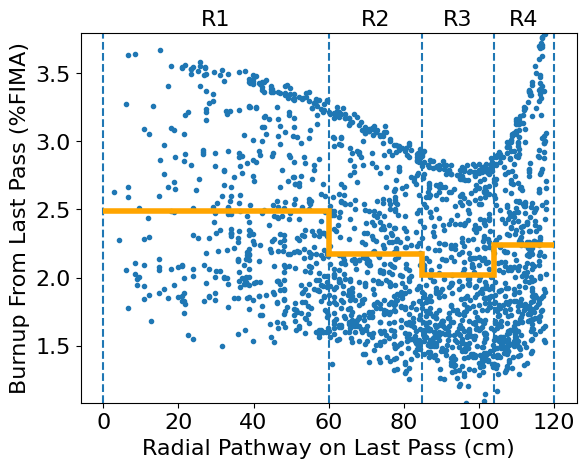

In [46]:
y_min = min(last_pass_burnup)*100
y_max = max(last_pass_burnup)*100
radial_boundaries = np.array([0.0000, 60.0000, 84.8528, 103.9230, 120.0000])
radial_avgs = []

for r in range(len(radial_boundaries)-1):
    ind = (last_pass_path > radial_boundaries[r])&(last_pass_path < radial_boundaries[r+1])
    radial_avgs += [np.mean(last_pass_burnup[ind])*100]
center_values = (radial_boundaries[:-1]+radial_boundaries[1:])/2
print(center_values)
plt.figure()
plt.plot(last_pass_path, last_pass_burnup*100, '.')
plt.xlabel("Radial Pathway on Last Pass (cm)")
plt.ylabel("Burnup From Last Pass (%FIMA)")
plt.vlines(radial_boundaries, ymin=y_min, ymax=y_max, linestyles="dashed")
plt.stairs(radial_avgs, radial_boundaries, color="orange", linewidth=4, zorder=4, baseline=None)
plt.ylim(y_min, y_max)
y_offset = 3.85
plt.text(center_values[0], y_offset, "R1", ha="center")
plt.text(center_values[1], y_offset, "R2", ha="center")
plt.text(center_values[2], y_offset, "R3", ha="center")
plt.text(center_values[3], y_offset, "R4", ha="center")
plt.show()